In [14]:
import json
import numpy as np
import gzip
import pickle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

import os



In [15]:
# Load configuration
with open("../config/config_notebooks.json", "r") as config_file:
    config = json.load(config_file)


In [16]:
with gzip.open(config['patches_info_path'], "rb") as f:
    patches_info = pickle.load(f)

In [17]:
## TODO: put here the path of the specific model you want to look at the representative patches and the number of clusters associated to it
model_of_interest = "uni"
n_clust_of_interest = 5

if model_of_interest in config['retrained_model_list1']:
    benchmark_path = config['retrained_benchmark_folder1']
else:
    benchmark_path = config['retrained_benchmark_folder2']

with open(os.path.join(benchmark_path, "invasive_cancer_clustering", config['invasive_cancer_clustering_algo'], model_of_interest, f"representative_patches_{n_clust_of_interest}_clusters_umap.json"), "r") as f:
    data_dict = json.load(f)

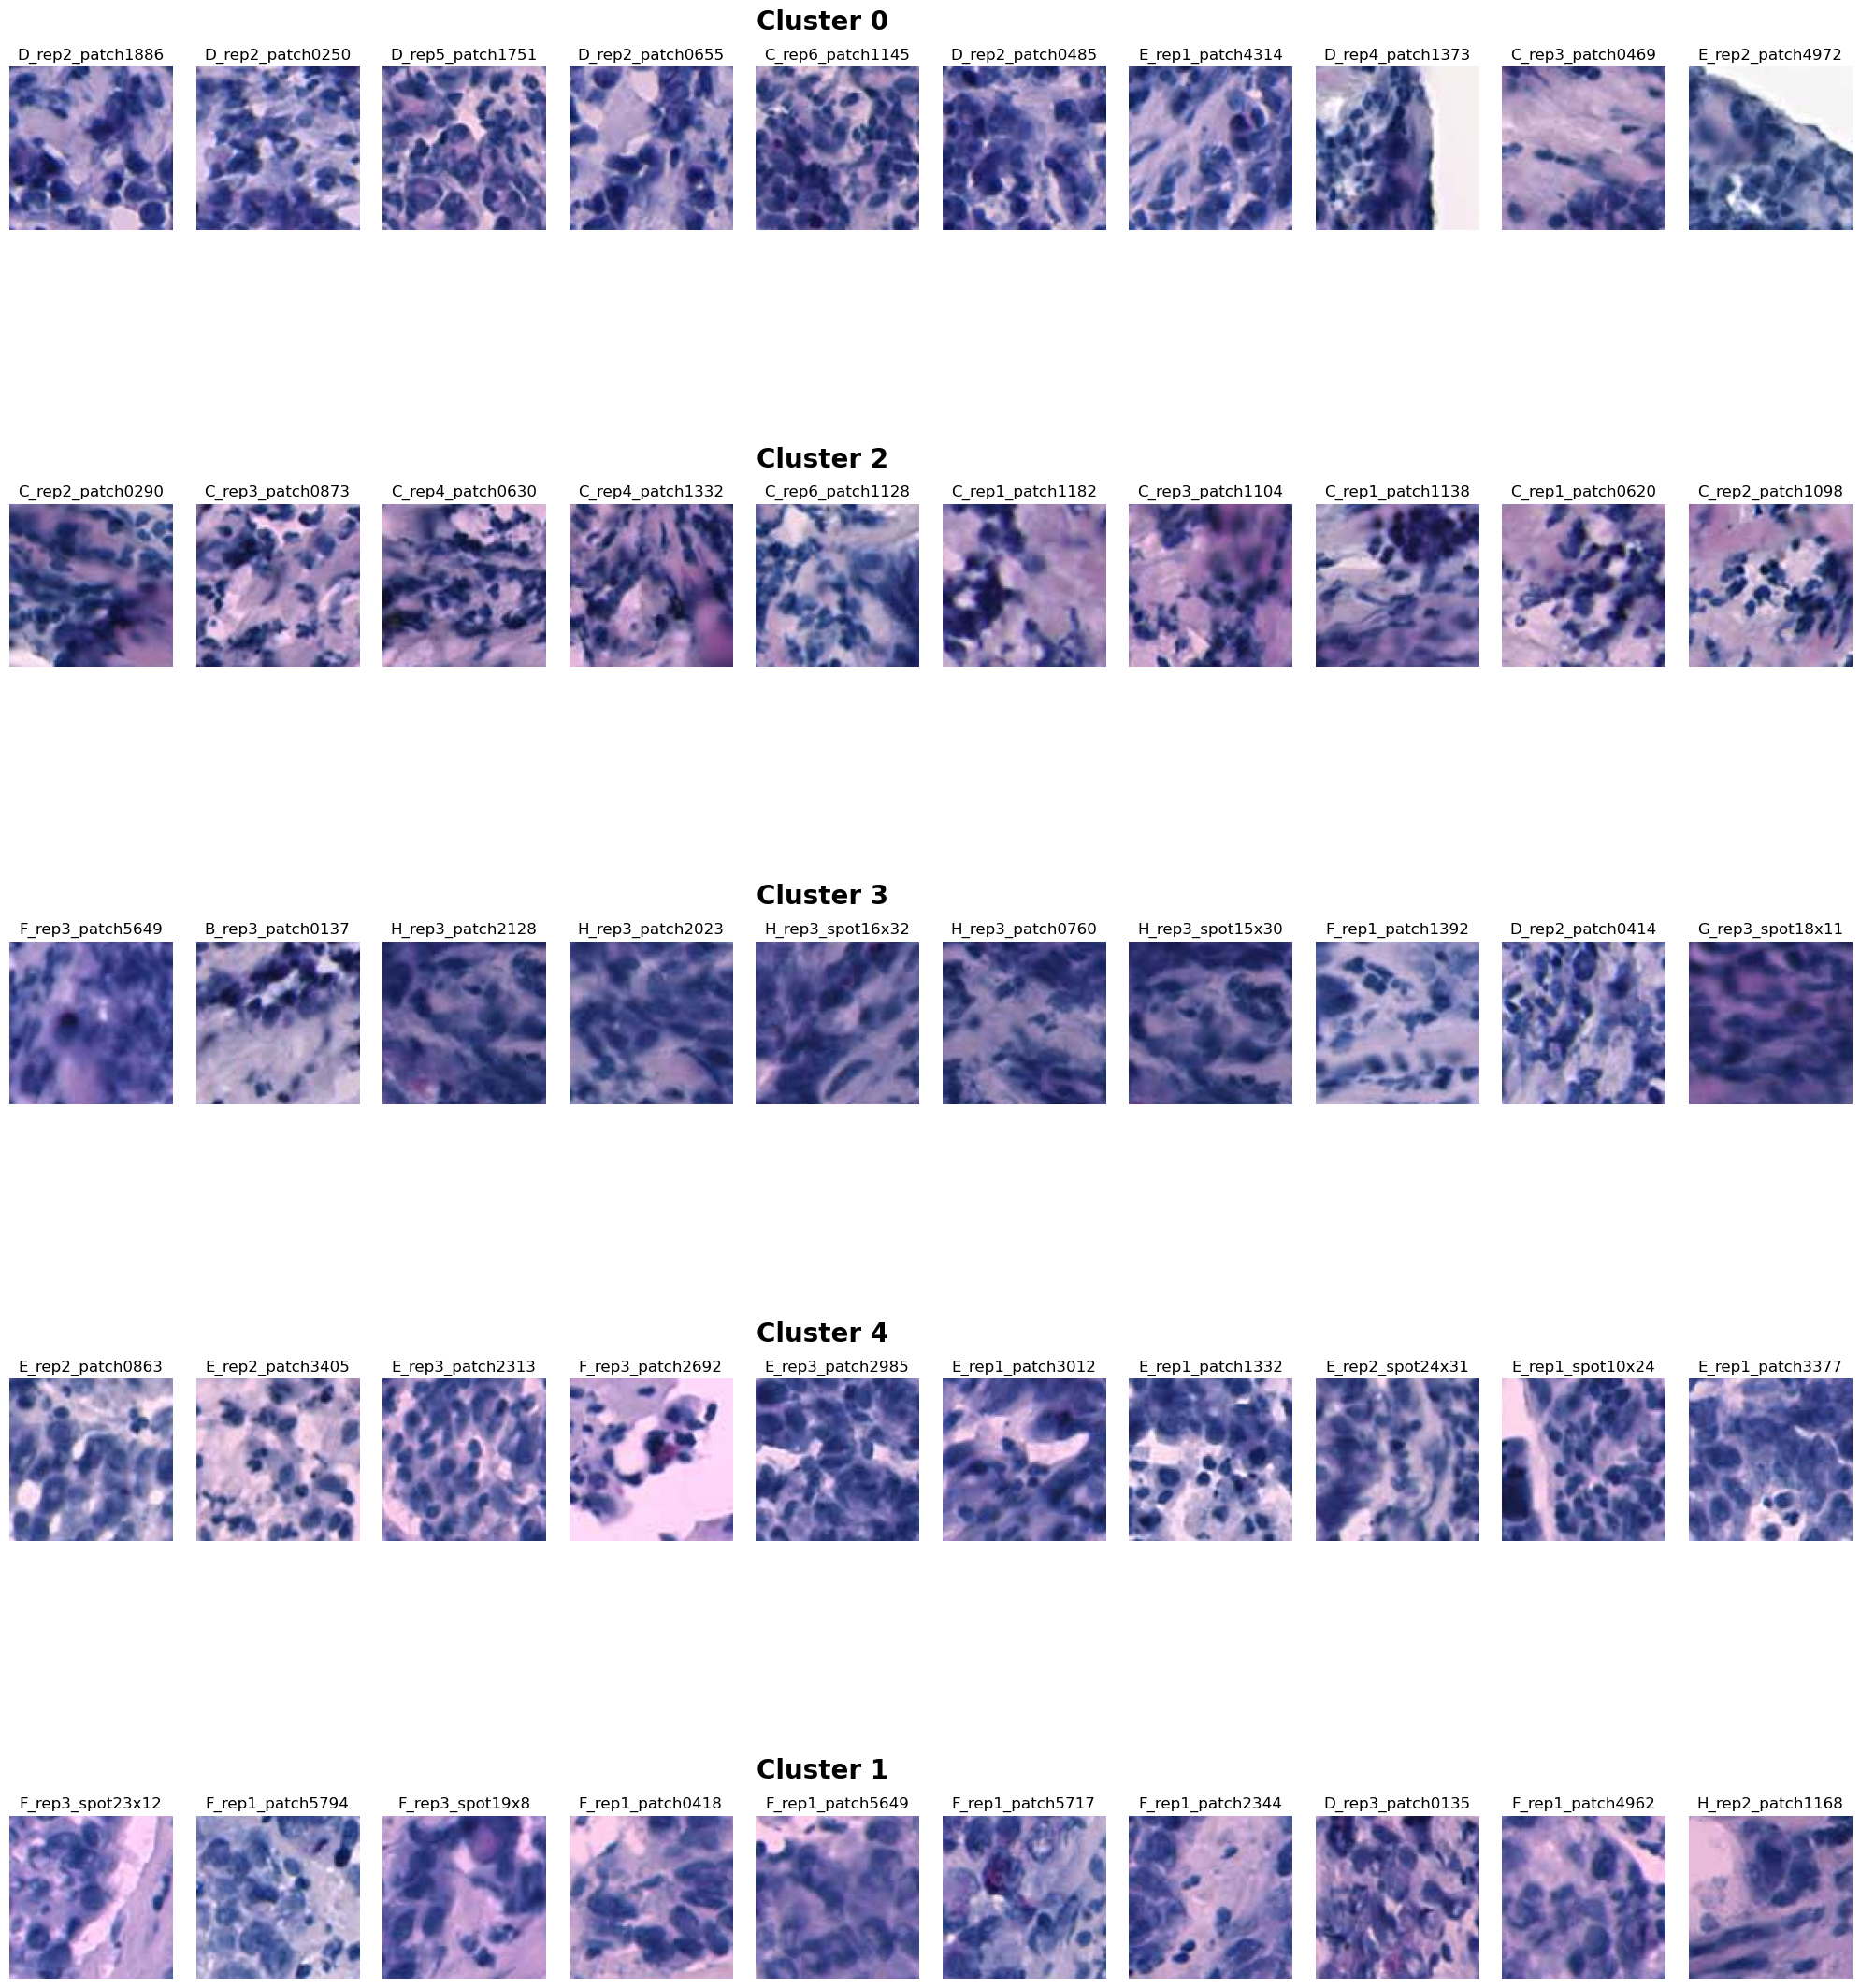

In [18]:
# Create a dictionary to map patch names to their paths
patches_dict = {patch['name']: patch['path'] for patch in patches_info}

# Determine the maximum number of samples in any cluster
max_samples = max(len(samples) for samples in data_dict.values())


plt.figure(figsize=(20, 5 * len(data_dict)))
# Plot the images
for row, (key, samples) in enumerate(data_dict.items()):
    #fig.suptitle('Clusters')
    for col in range(max_samples):
        plt.subplot(len(data_dict), max_samples, row * max_samples + col + 1)
        if col < len(samples):
            sample = samples[col]
            img_path = patches_dict.get(sample)
            if img_path:
                img = mpimg.imread(img_path)
                plt.imshow(img)
                plt.title(sample)
        plt.axis('off')
        
        if col == int(np.floor(max_samples/2) - 1):
            plt.text(s=f'Cluster {key}', x=0, y=-20, ha='left', va='bottom', fontsize=20, weight='bold')


plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os 


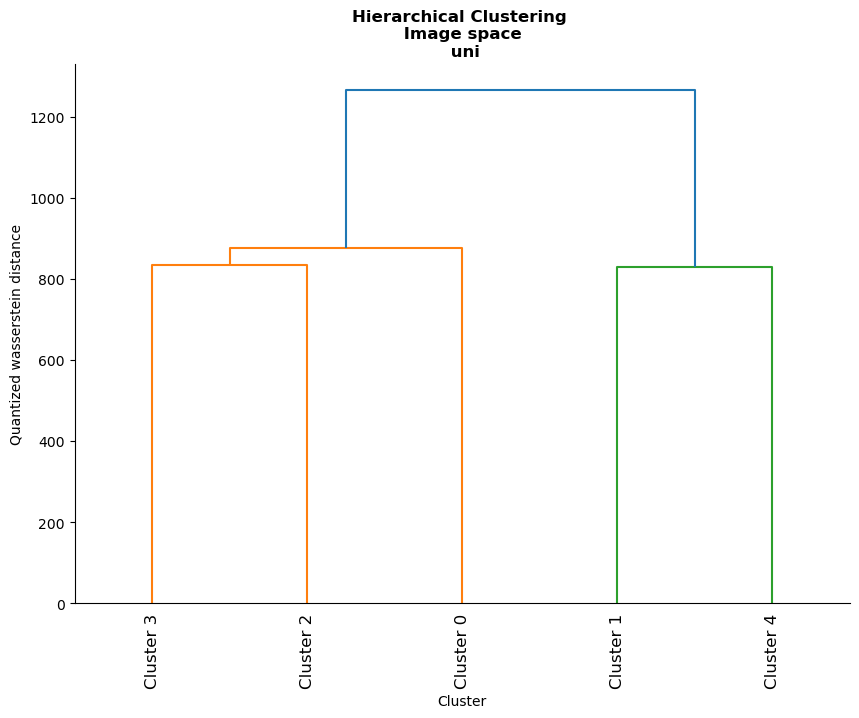

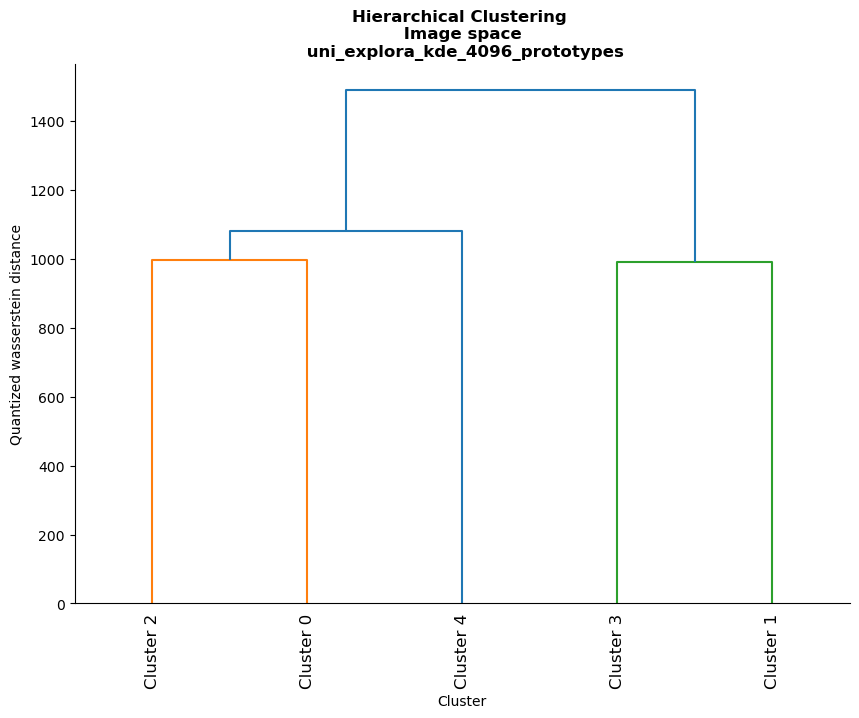

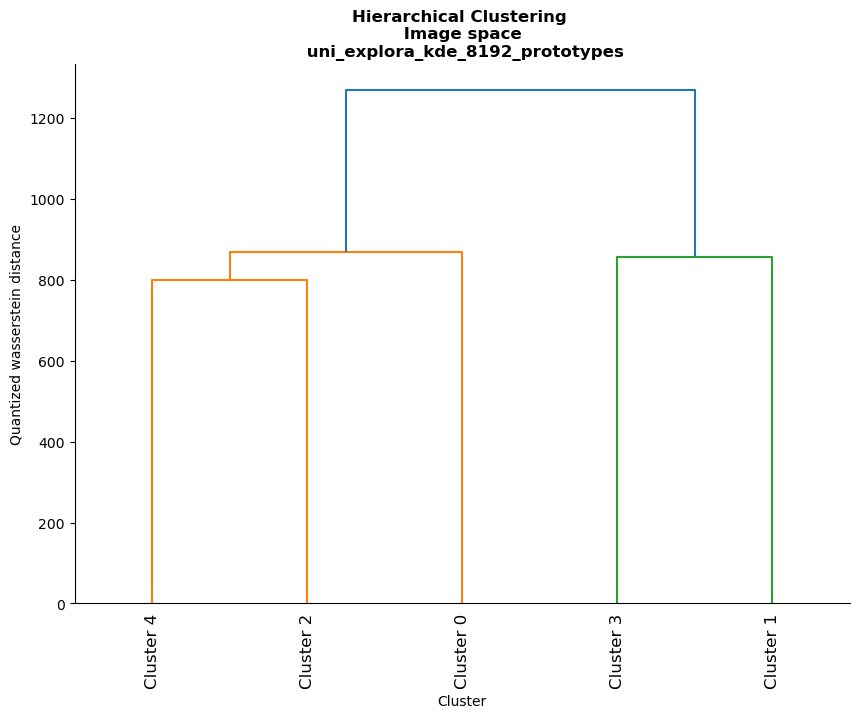

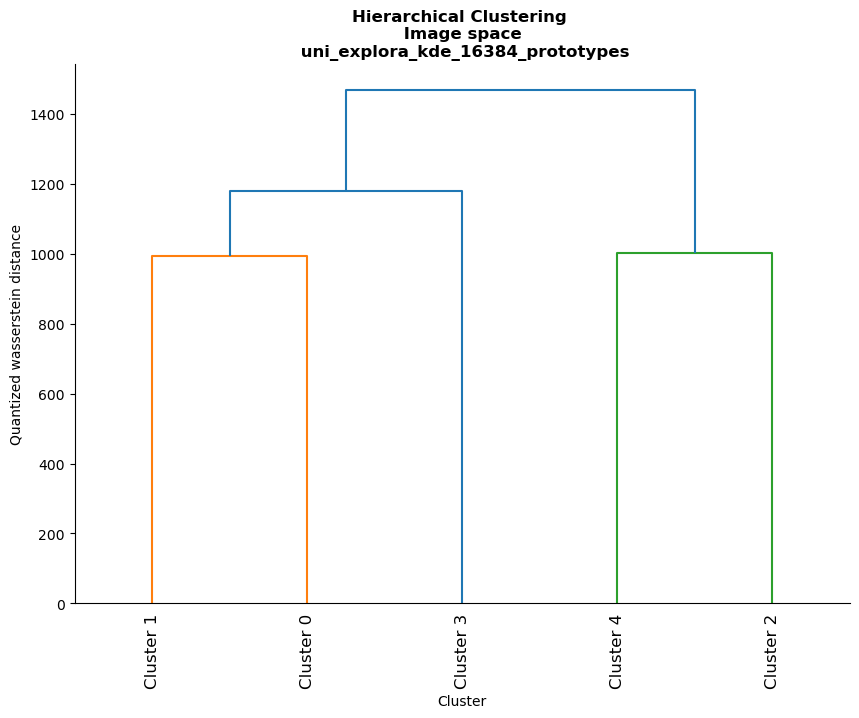

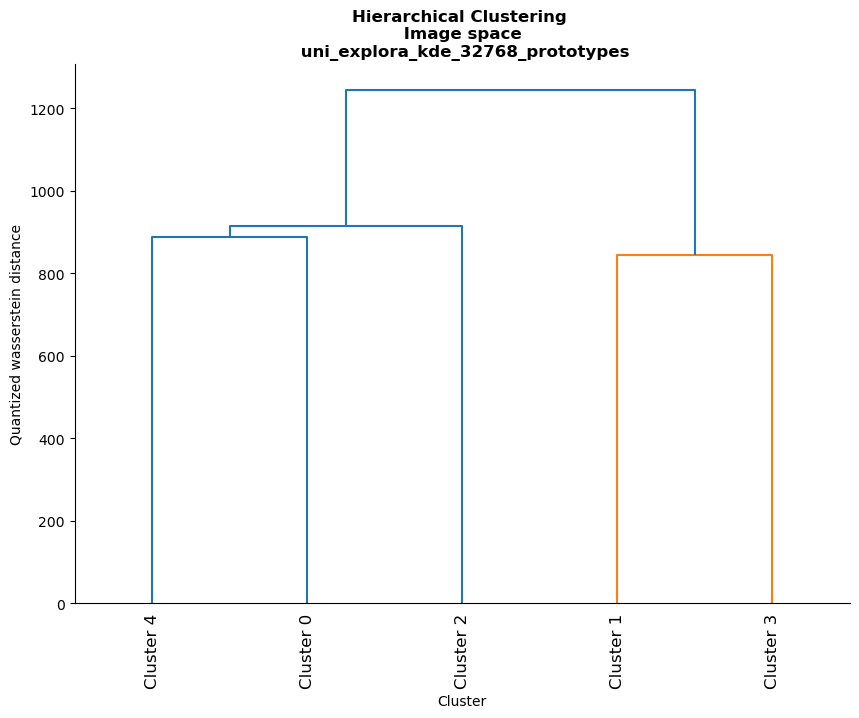

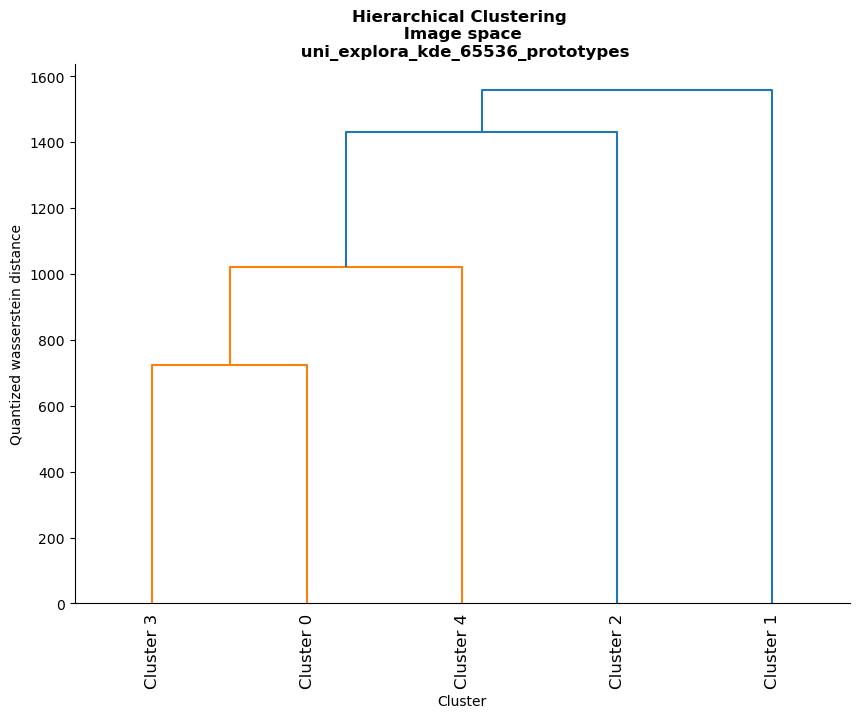

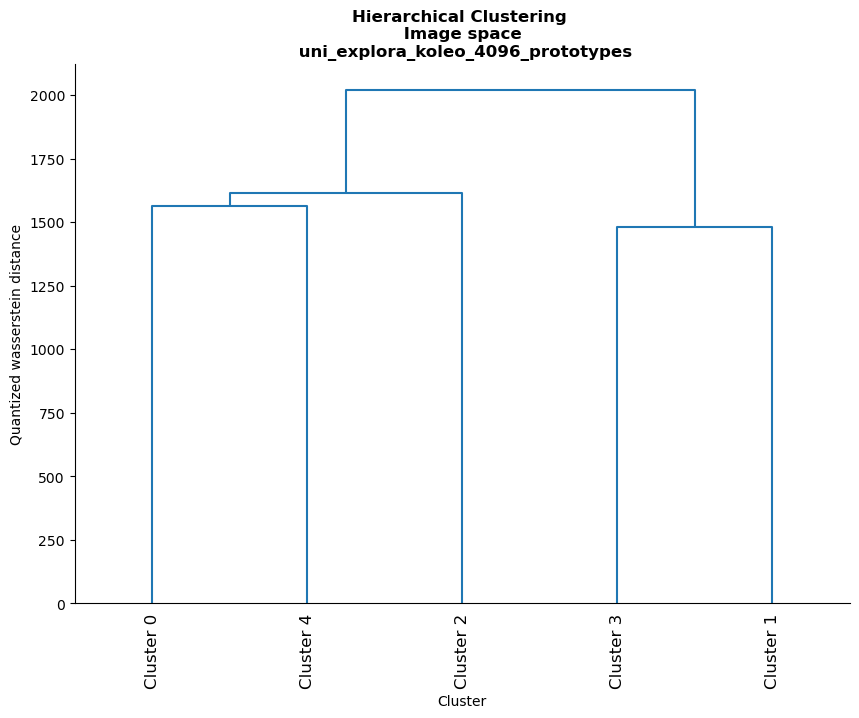

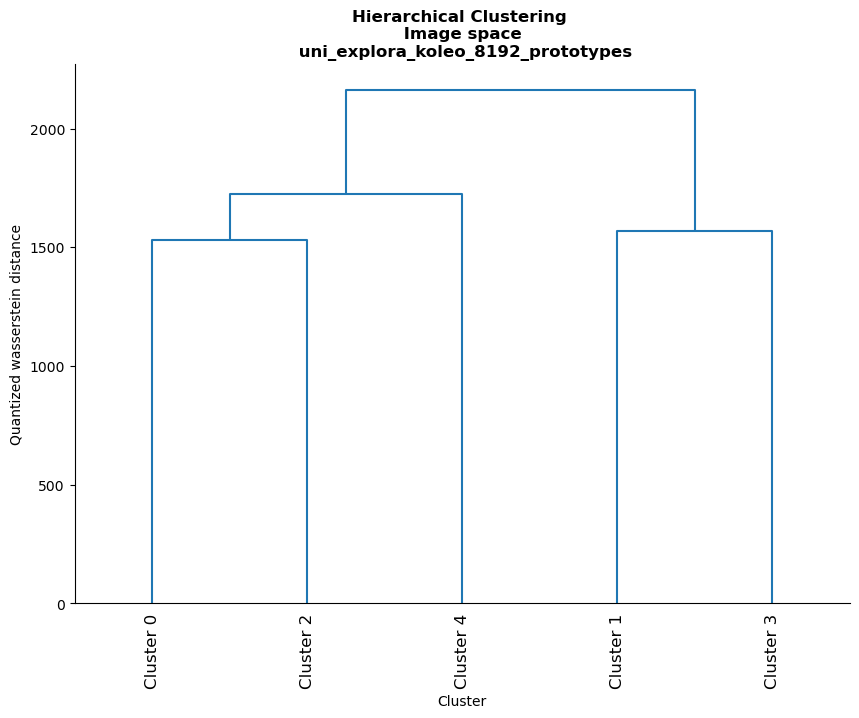

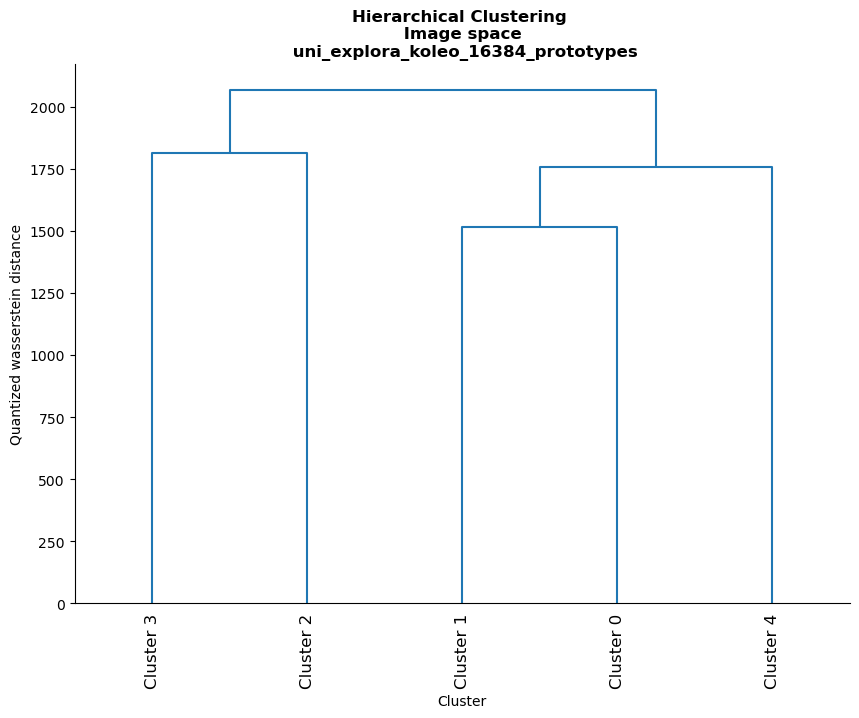

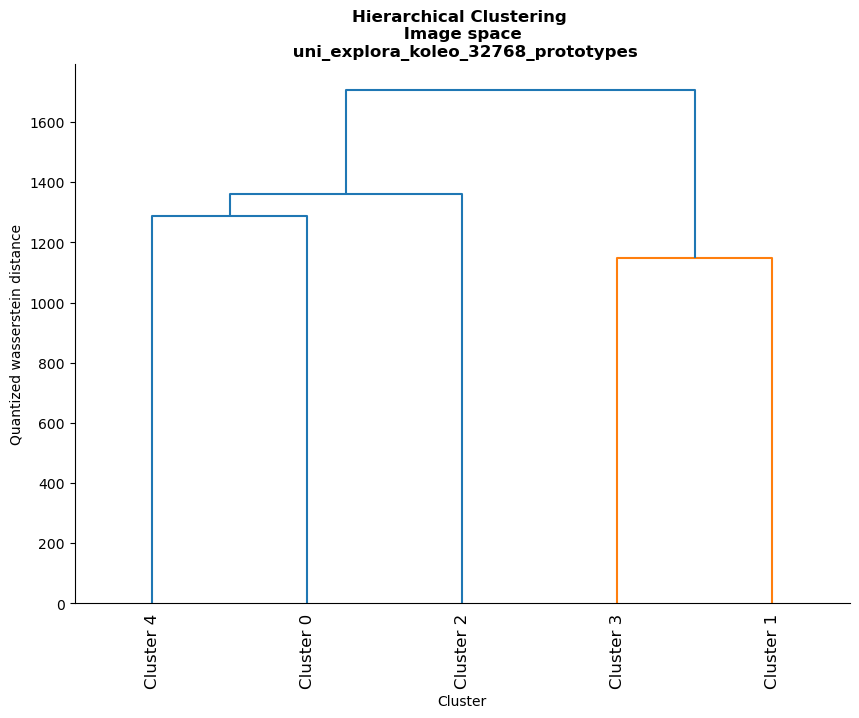

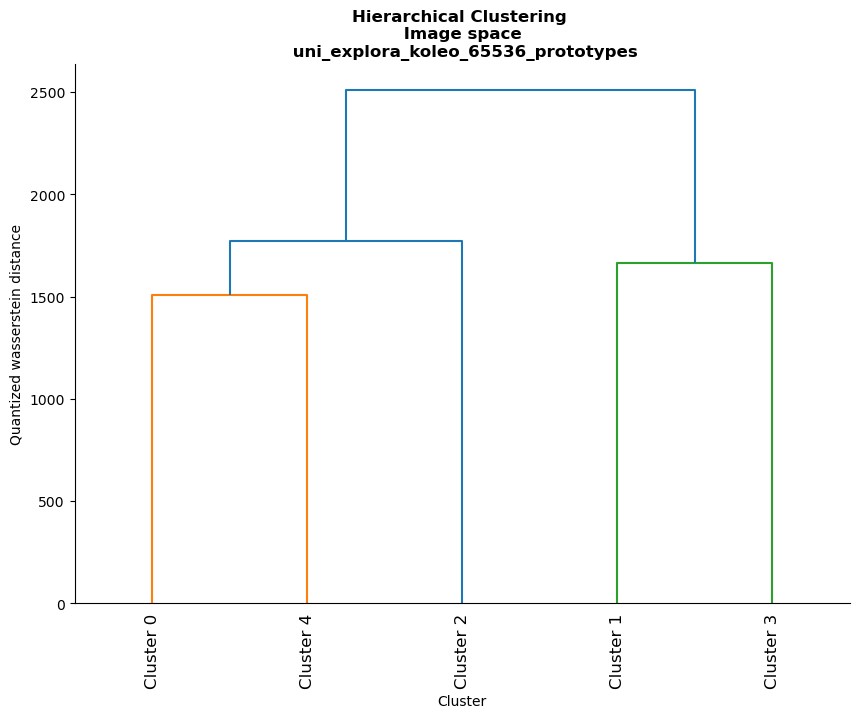

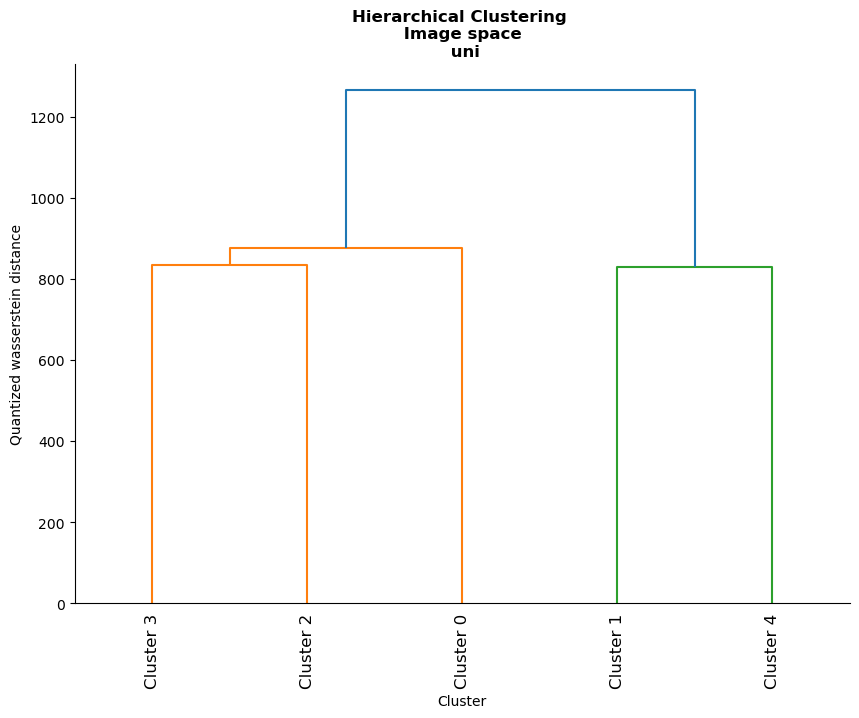

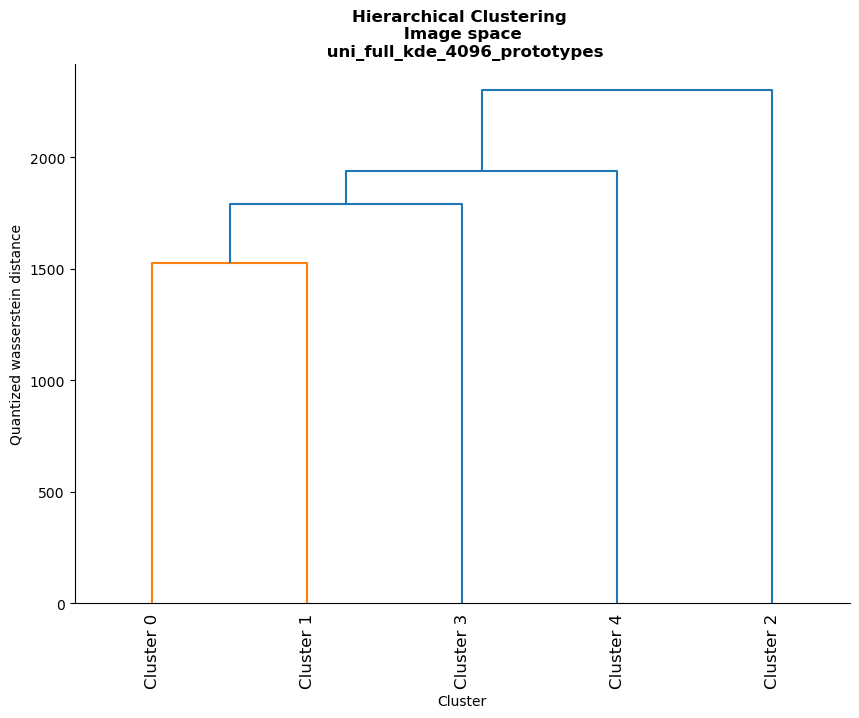

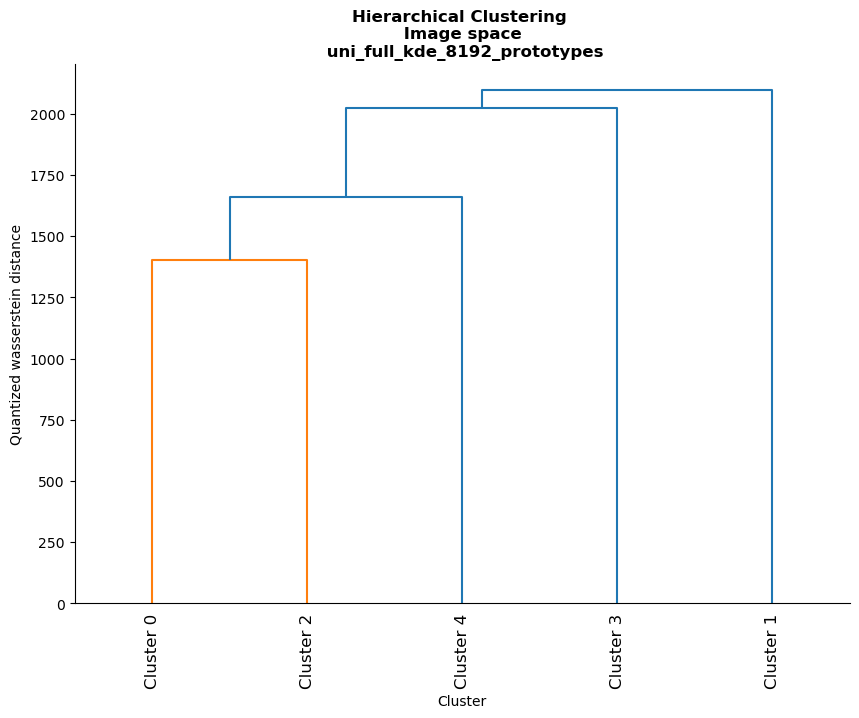

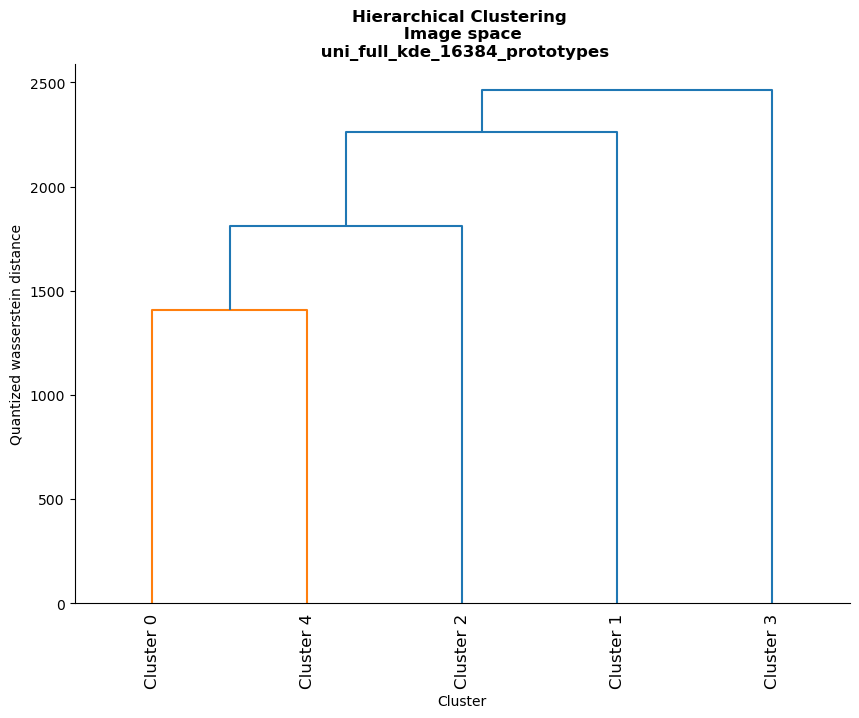

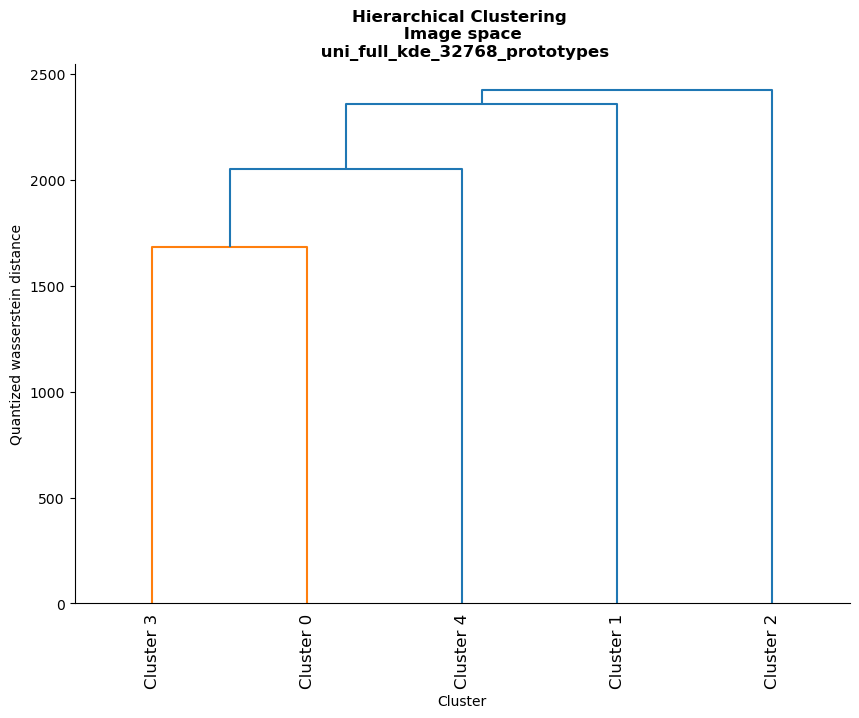

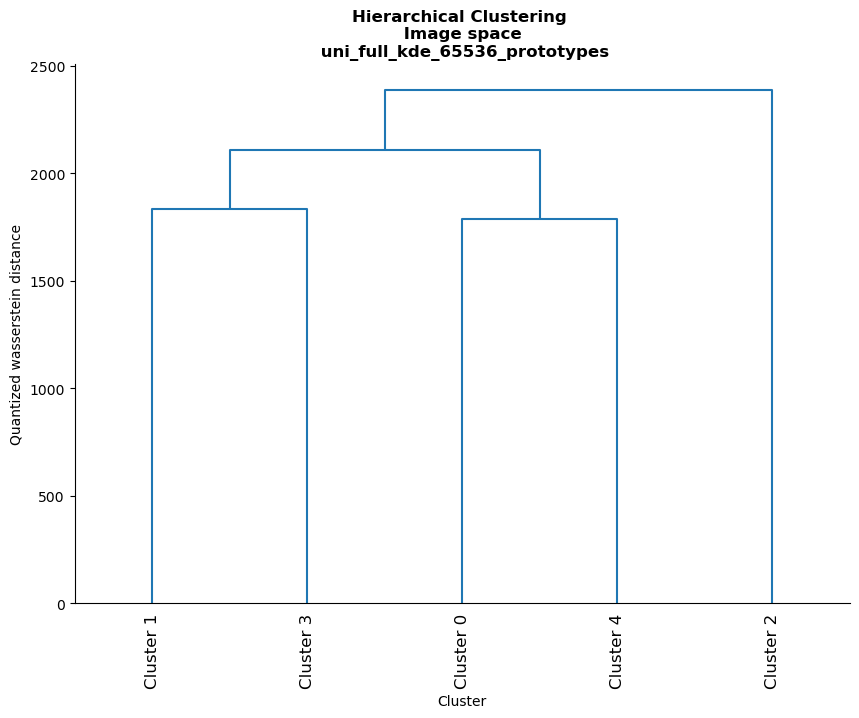

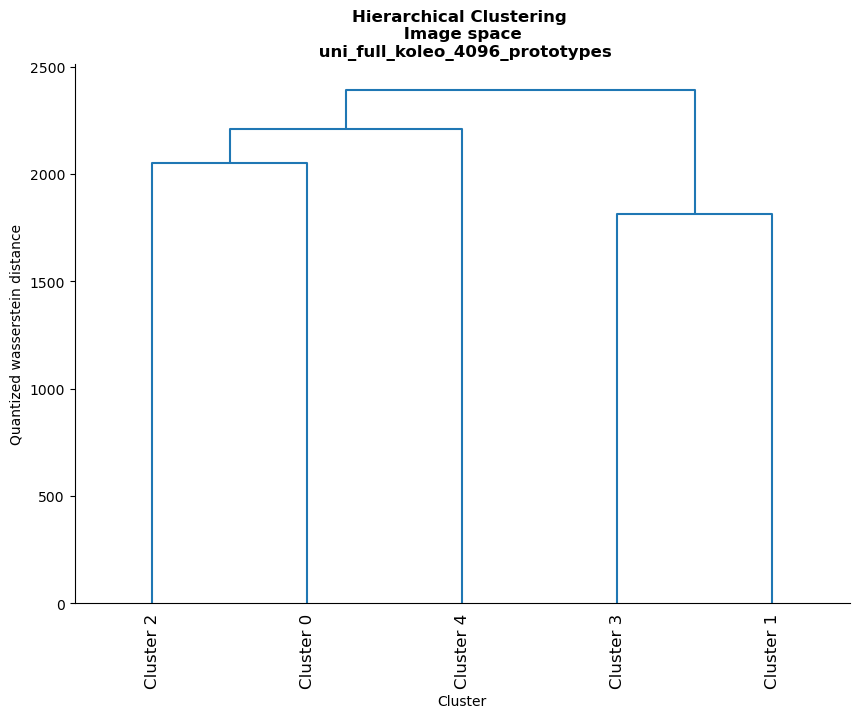

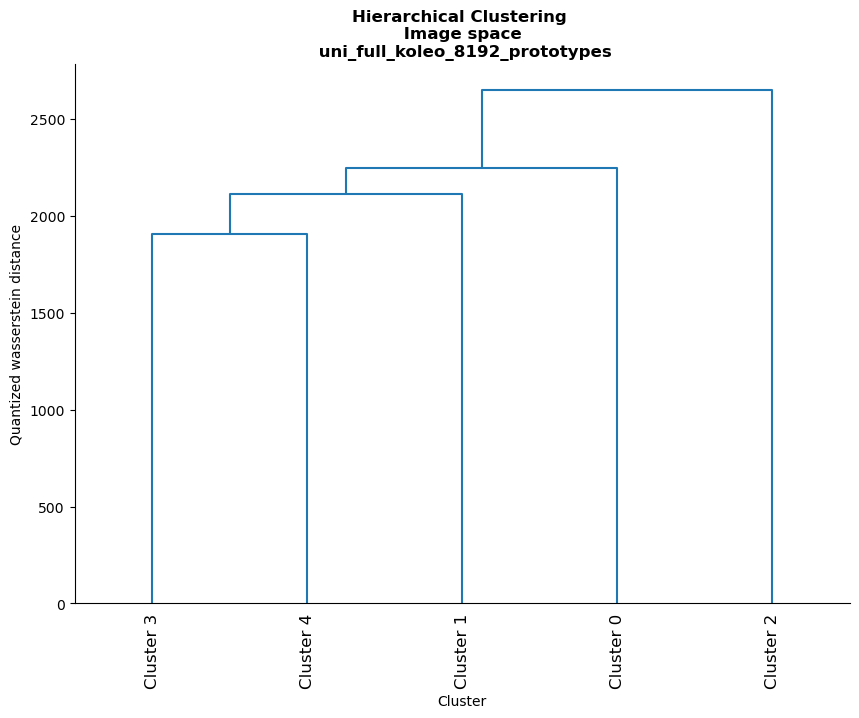

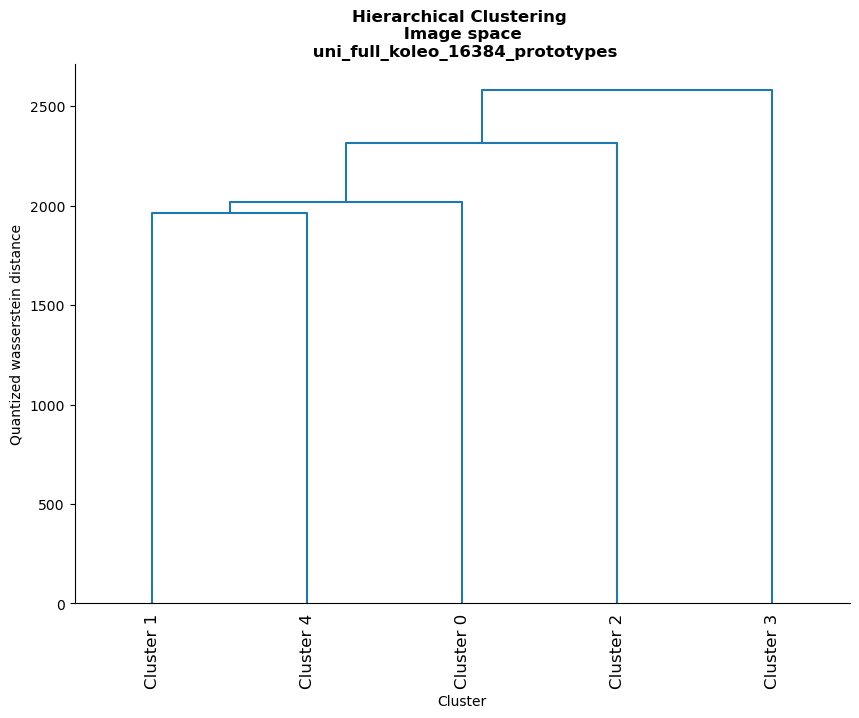

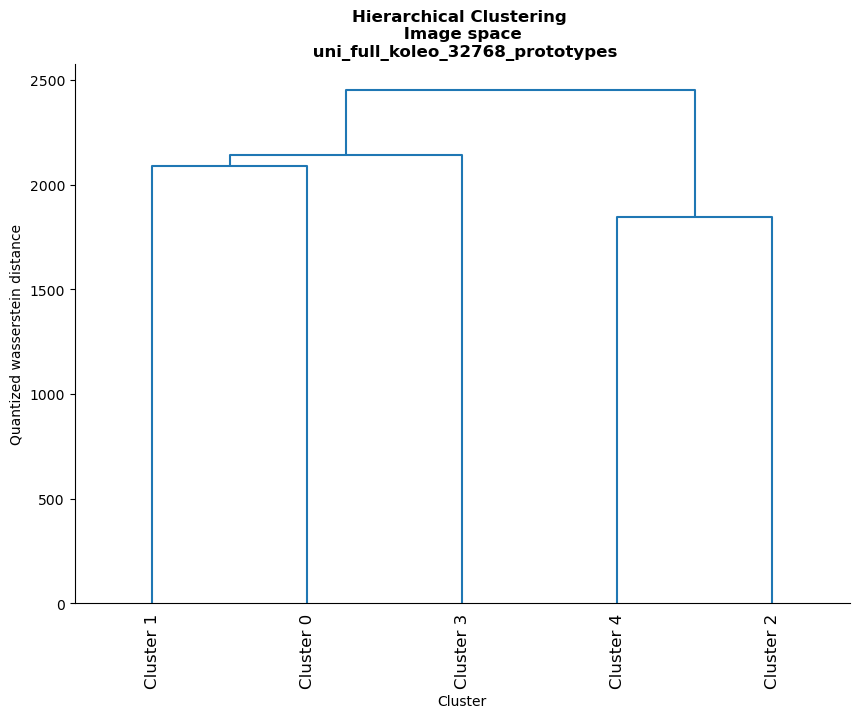

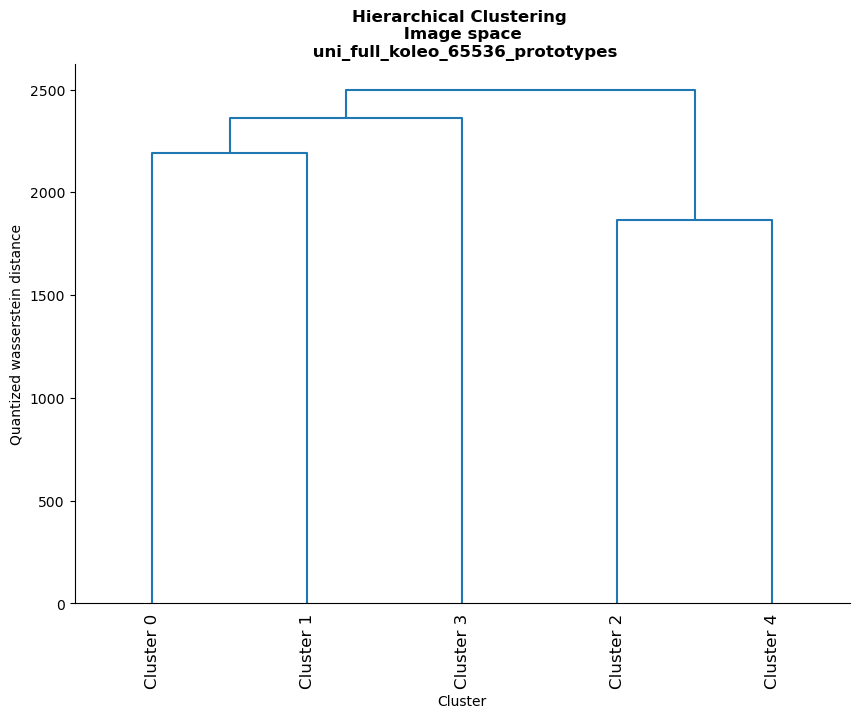

In [8]:

for model_type, names, benchmark_path in zip([config['retrained_model_list1_type'],
                              config['retrained_model_list2_type']],
                              [config['retrained_model_list1'],
                                config['retrained_model_list2']],
                                [config['retrained_benchmark_folder1'],
                                config['retrained_benchmark_folder2']]):
  path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")
  
  opti_clusters = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, "kmeans", "optimal_clusters.csv"), index_col=0)
  for name in names:

        
        
        path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")
        
        filenames = glob.glob(os.path.join(path_to_invasive_cancer_clustering_results, f"kmeans/{name}/quantized_wasserstein_distance_{name}_{opti_clusters.loc[name, 'n_clusters']}_clusters.csv"))
        
        for filename in filenames:
            
            base_name = os.path.basename(filename)
            
            quantized_wasserstein = pd.read_csv(filename, index_col=0)
            quantized_wasserstein.columns = [f"Cluster {col}" for col in quantized_wasserstein.columns]
            quantized_wasserstein.index = [f"Cluster {idx}" for idx in quantized_wasserstein.index]

            # Perform hierarchical clustering
            linked = sch.linkage(quantized_wasserstein, method='ward')

            # Plot the dendrogram
            plt.figure(figsize=(10, 7))
            dendrogram = sch.dendrogram(linked, labels=quantized_wasserstein.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)
            plt.title(f'Hierarchical Clustering \n Image space \n {name}', weight='bold')
            plt.xlabel('Cluster')
            plt.ylabel('Quantized wasserstein distance')
            plt.xticks(rotation=90)
            sns.despine()
            
            plt.savefig(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"dendrogram_{base_name.split('.csv')[0]}.pdf"), bbox_inches='tight')

uni
Common clusters between B and C: [0, 2, 3, 4]
Common clusters between B and D: [0, 1, 2, 3, 4]
Common clusters between B and E: [0, 1, 2, 3, 4]
Common clusters between B and F: [0, 1, 2, 3, 4]
Common clusters between B and G: [0, 1, 2, 3, 4]
Common clusters between B and H: [0, 1, 2, 3, 4]
Common clusters between C and D: [0, 2, 3, 4]
Common clusters between C and E: [0, 2, 3, 4]
Common clusters between C and F: [0, 2, 3, 4]
Common clusters between C and G: [0, 2, 3, 4]
Common clusters between C and H: [0, 2, 3, 4]
Common clusters between D and E: [0, 1, 2, 3, 4]
Common clusters between D and F: [0, 1, 2, 3, 4]
Common clusters between D and G: [0, 1, 2, 3, 4]
Common clusters between D and H: [0, 1, 2, 3, 4]
Common clusters between E and F: [0, 1, 2, 3, 4]
Common clusters between E and G: [0, 1, 2, 3, 4]
Common clusters between E and H: [0, 1, 2, 3, 4]
Common clusters between F and G: [0, 1, 2, 3, 4]
Common clusters between F and H: [0, 1, 2, 3, 4]
Common clusters between G and H: [

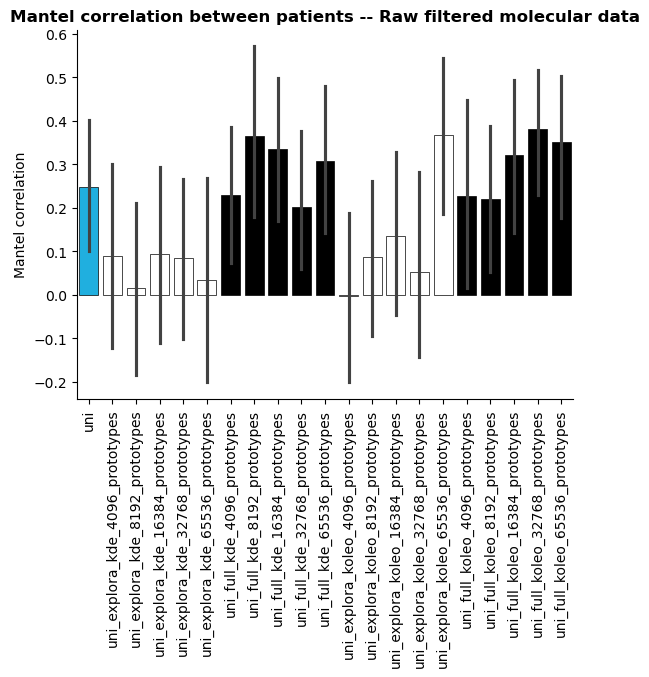

In [11]:
import mantel
patients = ["B", "C", "D", "E", "F","G", "H"]

results_mantel = {}
for model_type, names, benchmark_path in zip([config['retrained_model_list1_type'],
                                config['retrained_model_list2_type']],
                                [config['retrained_model_list1'],
                                config['retrained_model_list2']],
                                [config['retrained_benchmark_folder1'],
                                config['retrained_benchmark_folder2']]):

    
    
    path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")
    opti_clusters = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, "kmeans", "optimal_clusters.csv"), index_col=0)
    
    optimal_cluster_numbers = opti_clusters.loc[names, 'n_clusters'].values

    
    
    for name, cluster_number in zip(names, optimal_cluster_numbers):


        #if name != "uni" and name != "uni_full_kde_4096_prototypes":
        
        results_mantel[name] = {}
        
        print(name)
        filename = glob.glob(os.path.join(path_to_invasive_cancer_clustering_results, 
                                          config["invasive_cancer_clustering_algo"], 
                                          name, 
                                          f"quantized_wasserstein_distance_molecular_raw_filtered_{name}_{cluster_number}_clusters_patient_B.csv"))[0]
        
        cluster_number = os.path.basename(filename).split("_")[-4]
        
        mantel_correlations = []
        for i in range(len(patients)):
            for j in range(i+1, len(patients)):
                # distance_matrix1 = pd.read_csv(f"../results/benchmark/her2_final_without_A/uni_full_models/invasive_cancer_clustering/kmeans/uni_full_koleo_16384_prototypes/quantized_wasserstein_distance_molecular_raw_filtered_uni_full_koleo_16384_prototypes_{cluster_number}_clusters_patient_{patients[i]}.csv", index_col=0)
                # distance_matrix2 = pd.read_csv(f"../results/benchmark/her2_final_without_A/uni_full_models/invasive_cancer_clustering/kmeans/uni_full_koleo_16384_prototypes/quantized_wasserstein_distance_molecular_raw_filtered_uni_full_koleo_16384_prototypes_{cluster_number}_clusters_patient_{patients[j]}.csv", index_col=0)
                distance_matrix1 = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"quantized_wasserstein_distance_molecular_raw_filtered_{name}_{cluster_number}_clusters_patient_{patients[i]}.csv"), index_col=0)
                distance_matrix2 = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"quantized_wasserstein_distance_molecular_raw_filtered_{name}_{cluster_number}_clusters_patient_{patients[j]}.csv"), index_col=0)

                    
                # find the common clusters
                common_clusters = list(set(distance_matrix1.index).intersection(set(distance_matrix2.index)))
                distance_matrix1 = distance_matrix1.loc[common_clusters][[str(cluster) for cluster in common_clusters]]
                distance_matrix2 = distance_matrix2.loc[common_clusters][[str(cluster) for cluster in common_clusters]]
                print(f"Common clusters between {patients[i]} and {patients[j]}: {common_clusters}")
                    
                ## order the matrices
                # distance_matrix1 = (distance_matrix1.loc[list(range(cluster_number))])[[str(i) for i in range(cluster_number)]]
                # distance_matrix2 = (distance_matrix2.loc[list(range(cluster_number))])[[str(i) for i in range(cluster_number)]]
                
                mantel_corr = mantel.test(distance_matrix1.values, distance_matrix2.values, perms=1000, method='pearson', tail='upper')
                mantel_correlations.append(mantel_corr.r)
        results_mantel[name] = mantel_correlations

df = pd.DataFrame(results_mantel)[["uni",
              "uni_explora_kde_4096_prototypes",
              "uni_explora_kde_8192_prototypes",
              "uni_explora_kde_16384_prototypes",
              "uni_explora_kde_32768_prototypes",
                "uni_explora_kde_65536_prototypes",
                "uni_full_kde_4096_prototypes",
                "uni_full_kde_8192_prototypes",
                "uni_full_kde_16384_prototypes",
                "uni_full_kde_32768_prototypes",
                "uni_full_kde_65536_prototypes",
                "uni_explora_koleo_4096_prototypes",
                "uni_explora_koleo_8192_prototypes",
                "uni_explora_koleo_16384_prototypes",
                "uni_explora_koleo_32768_prototypes",
                "uni_explora_koleo_65536_prototypes",
                "uni_full_koleo_4096_prototypes",
                "uni_full_koleo_8192_prototypes",
                "uni_full_koleo_16384_prototypes",
                "uni_full_koleo_32768_prototypes",
                "uni_full_koleo_65536_prototypes"]]



sns.barplot(df, palette=["deepskyblue", "white", "white", "white", "white", "white", "black", 
         "black", "black","black", "black", "white", "white", "white", 
         "white", "white", "black", "black", "black", "black","black",],            
            linewidth=0.5,
            edgecolor="black",)
plt.xticks(rotation=90)
sns.despine()
plt.title("Mantel correlation between patients -- Raw filtered molecular data", weight='bold')
plt.ylabel("Mantel correlation")
plt.savefig(os.path.join(config['figures_folder'], "Figure4", "mantel_correlation_dendrogram_patients_raw_filtered_data.pdf"), bbox_inches='tight')

uni
Common clusters between B and C: [0, 2, 3, 4]
Common clusters between B and D: [0, 1, 2, 3, 4]
Common clusters between B and E: [0, 1, 2, 3, 4]
Common clusters between B and F: [0, 1, 2, 3, 4]
Common clusters between B and G: [0, 1, 2, 3, 4]
Common clusters between B and H: [0, 1, 2, 3, 4]
Common clusters between C and D: [0, 2, 3, 4]
Common clusters between C and E: [0, 2, 3, 4]
Common clusters between C and F: [0, 2, 3, 4]
Common clusters between C and G: [0, 2, 3, 4]
Common clusters between C and H: [0, 2, 3, 4]
Common clusters between D and E: [0, 1, 2, 3, 4]
Common clusters between D and F: [0, 1, 2, 3, 4]
Common clusters between D and G: [0, 1, 2, 3, 4]
Common clusters between D and H: [0, 1, 2, 3, 4]
Common clusters between E and F: [0, 1, 2, 3, 4]
Common clusters between E and G: [0, 1, 2, 3, 4]
Common clusters between E and H: [0, 1, 2, 3, 4]
Common clusters between F and G: [0, 1, 2, 3, 4]
Common clusters between F and H: [0, 1, 2, 3, 4]
Common clusters between G and H: [

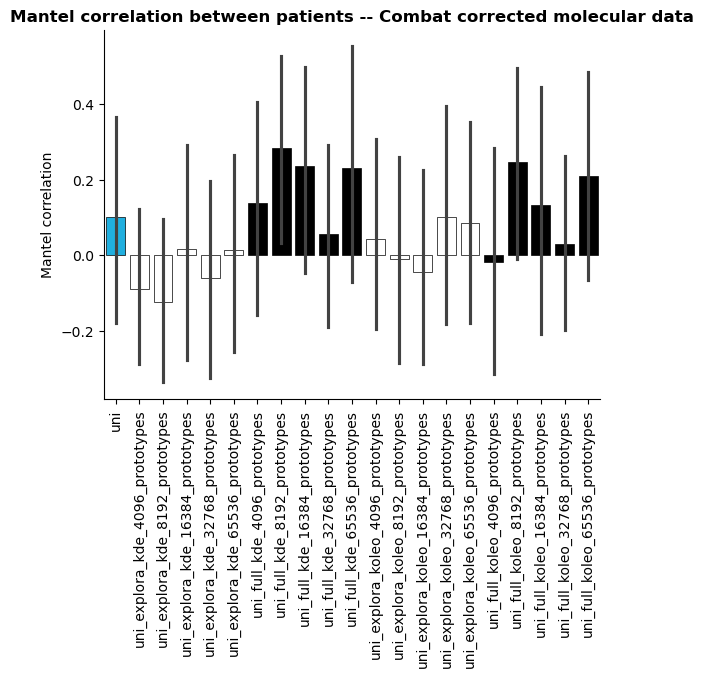

In [12]:
import mantel
patients = ["B", "C", "D", "E", "F","G", "H"]

results_mantel = {}
for model_type, names, benchmark_path in zip([config['retrained_model_list1_type'],
                                config['retrained_model_list2_type']],
                                [config['retrained_model_list1'],
                                config['retrained_model_list2']],
                                [config['retrained_benchmark_folder1'],
                                config['retrained_benchmark_folder2']]):

    
    
    path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")
    opti_clusters = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, "kmeans", "optimal_clusters.csv"), index_col=0)
    
    optimal_cluster_numbers = opti_clusters.loc[names, 'n_clusters'].values

    
    
    for name, cluster_number in zip(names, optimal_cluster_numbers):


        #if name != "uni" and name != "uni_full_kde_4096_prototypes":
        
        results_mantel[name] = {}
        
        print(name)
        filename = glob.glob(os.path.join(path_to_invasive_cancer_clustering_results, 
                                          config["invasive_cancer_clustering_algo"], 
                                          name, 
                                          f"quantized_wasserstein_distance_molecular_combat_corrected_{name}_{cluster_number}_clusters_patient_B.csv"))[0]
        
        cluster_number = os.path.basename(filename).split("_")[-4]
        
        mantel_correlations = []
        for i in range(len(patients)):
            for j in range(i+1, len(patients)):
                # distance_matrix1 = pd.read_csv(f"../results/benchmark/her2_final_without_A/uni_full_models/invasive_cancer_clustering/kmeans/uni_full_koleo_16384_prototypes/quantized_wasserstein_distance_molecular_combat_corrected_uni_full_koleo_16384_prototypes_{cluster_number}_clusters_patient_{patients[i]}.csv", index_col=0)
                # distance_matrix2 = pd.read_csv(f"../results/benchmark/her2_final_without_A/uni_full_models/invasive_cancer_clustering/kmeans/uni_full_koleo_16384_prototypes/quantized_wasserstein_distance_molecular_combat_corrected_uni_full_koleo_16384_prototypes_{cluster_number}_clusters_patient_{patients[j]}.csv", index_col=0)
                distance_matrix1 = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"quantized_wasserstein_distance_molecular_combat_corrected_{name}_{cluster_number}_clusters_patient_{patients[i]}.csv"), index_col=0)
                distance_matrix2 = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"quantized_wasserstein_distance_molecular_combat_corrected_{name}_{cluster_number}_clusters_patient_{patients[j]}.csv"), index_col=0)

                    
                # find the common clusters
                common_clusters = list(set(distance_matrix1.index).intersection(set(distance_matrix2.index)))
                distance_matrix1 = distance_matrix1.loc[common_clusters][[str(cluster) for cluster in common_clusters]]
                distance_matrix2 = distance_matrix2.loc[common_clusters][[str(cluster) for cluster in common_clusters]]
                print(f"Common clusters between {patients[i]} and {patients[j]}: {common_clusters}")
                    
                ## order the matrices
                # distance_matrix1 = (distance_matrix1.loc[list(range(cluster_number))])[[str(i) for i in range(cluster_number)]]
                # distance_matrix2 = (distance_matrix2.loc[list(range(cluster_number))])[[str(i) for i in range(cluster_number)]]
                
                mantel_corr = mantel.test(distance_matrix1.values, distance_matrix2.values, perms=1000, method='pearson', tail='upper')
                mantel_correlations.append(mantel_corr.r)
        results_mantel[name] = mantel_correlations

df = pd.DataFrame(results_mantel)[["uni",
              "uni_explora_kde_4096_prototypes",
              "uni_explora_kde_8192_prototypes",
              "uni_explora_kde_16384_prototypes",
              "uni_explora_kde_32768_prototypes",
                "uni_explora_kde_65536_prototypes",
                "uni_full_kde_4096_prototypes",
                "uni_full_kde_8192_prototypes",
                "uni_full_kde_16384_prototypes",
                "uni_full_kde_32768_prototypes",
                "uni_full_kde_65536_prototypes",
                "uni_explora_koleo_4096_prototypes",
                "uni_explora_koleo_8192_prototypes",
                "uni_explora_koleo_16384_prototypes",
                "uni_explora_koleo_32768_prototypes",
                "uni_explora_koleo_65536_prototypes",
                "uni_full_koleo_4096_prototypes",
                "uni_full_koleo_8192_prototypes",
                "uni_full_koleo_16384_prototypes",
                "uni_full_koleo_32768_prototypes",
                "uni_full_koleo_65536_prototypes"]]



sns.barplot(df, palette=["deepskyblue", "white", "white", "white", "white", "white", "black", 
         "black", "black","black", "black", "white", "white", "white", 
         "white", "white", "black", "black", "black", "black","black",],            
            linewidth=0.5,
            edgecolor="black",)
plt.xticks(rotation=90)
sns.despine()
plt.title("Mantel correlation between patients -- Combat corrected molecular data", weight='bold')
plt.ylabel("Mantel correlation")
plt.savefig(os.path.join(config['figures_folder'], "Figure4", "mantel_correlation_dendrogram_patients_combat_corrected_data.pdf"), bbox_inches='tight')

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


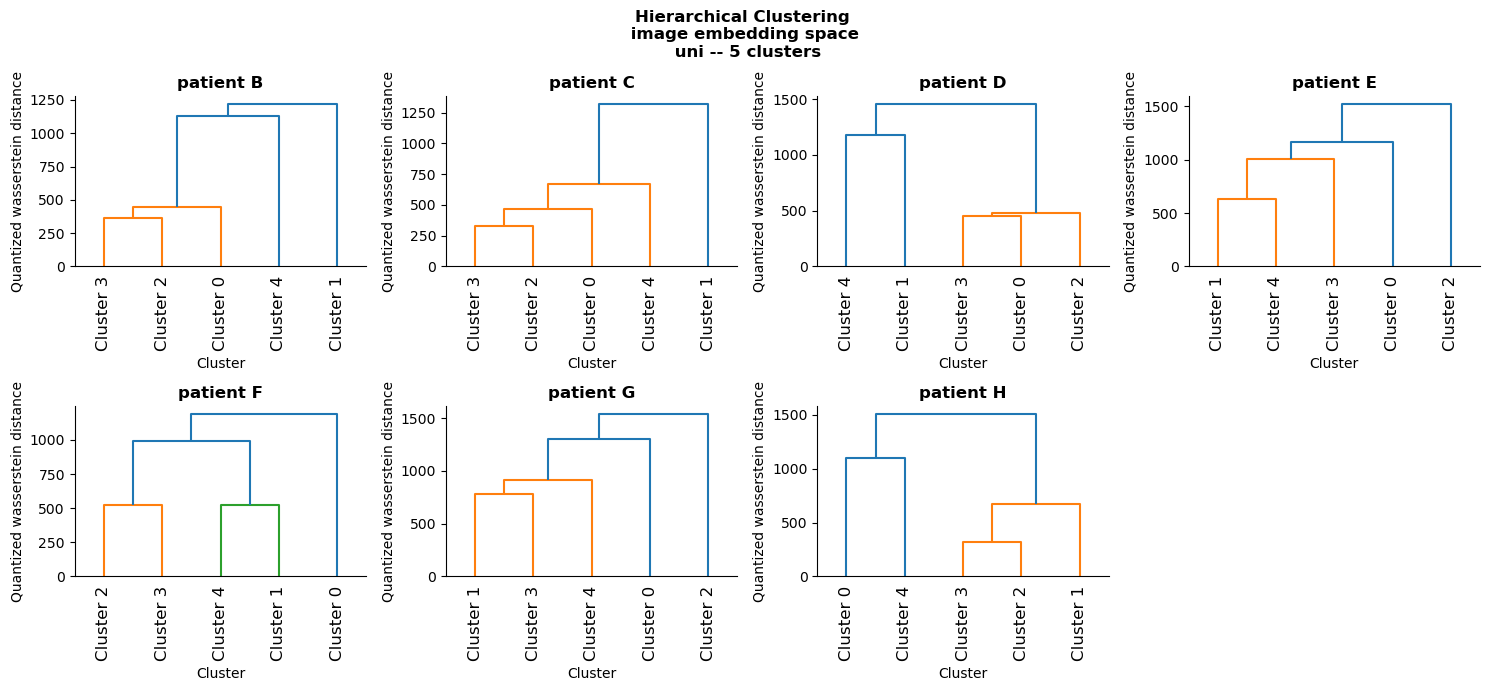

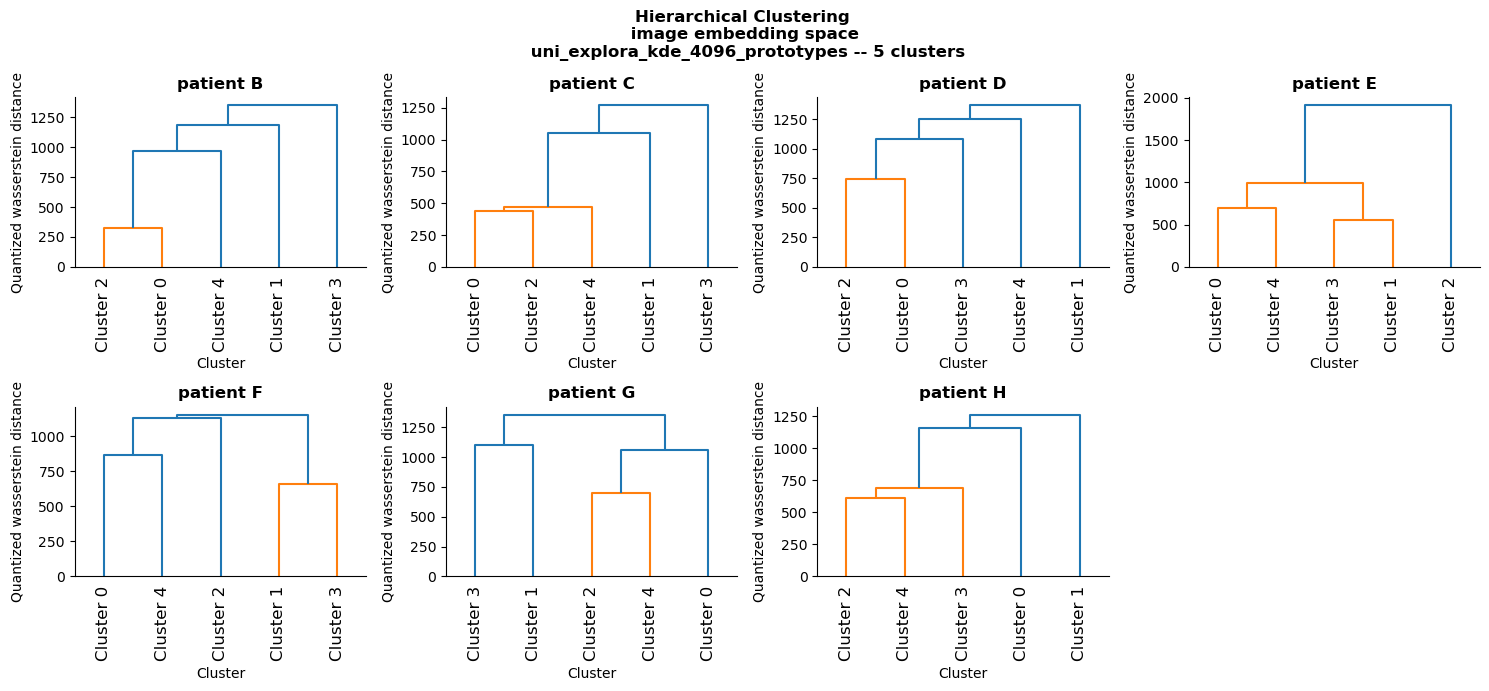

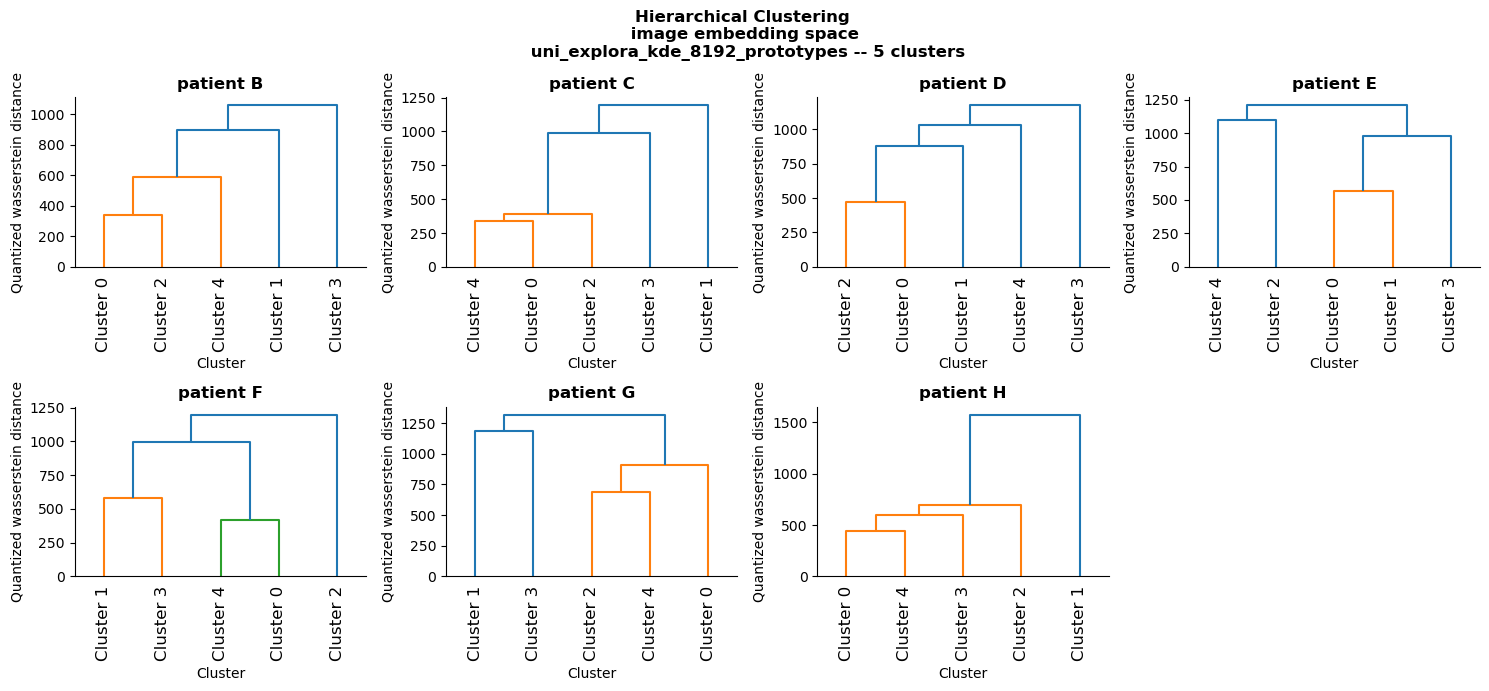

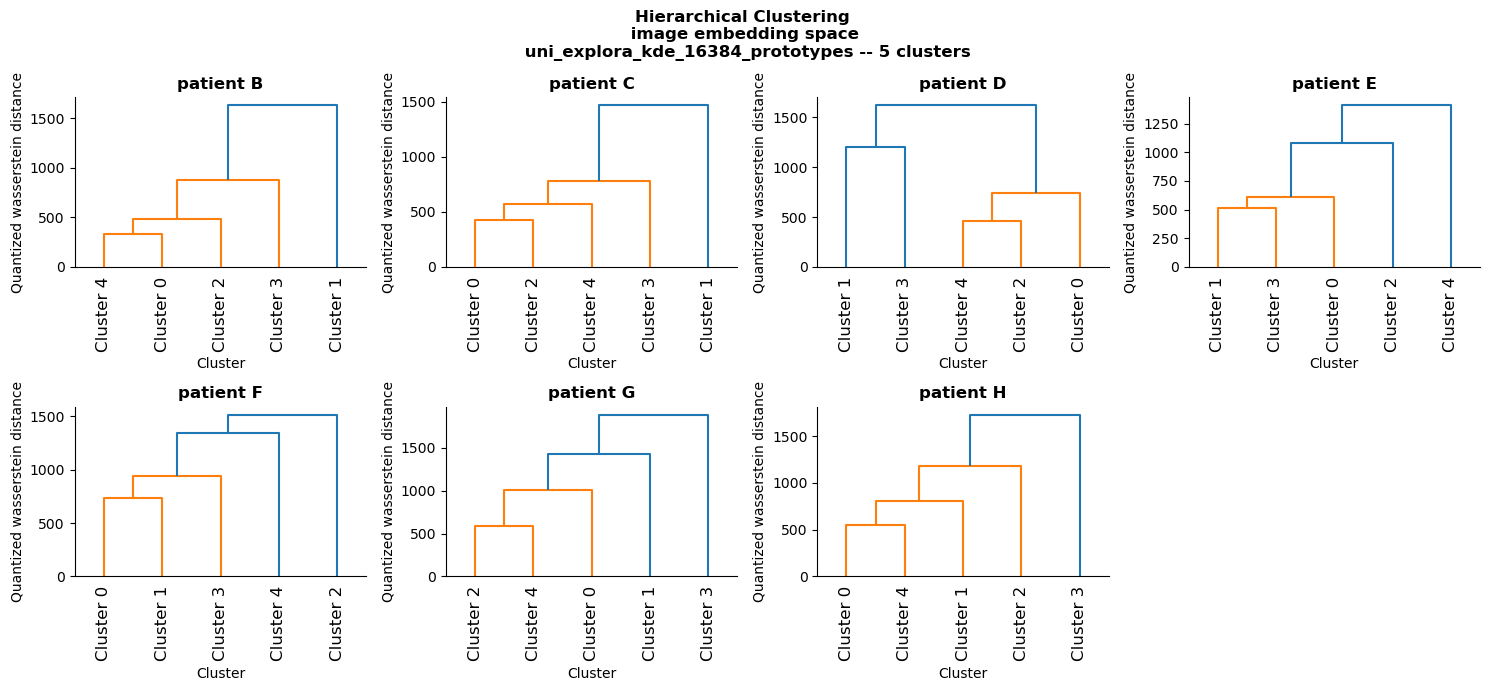

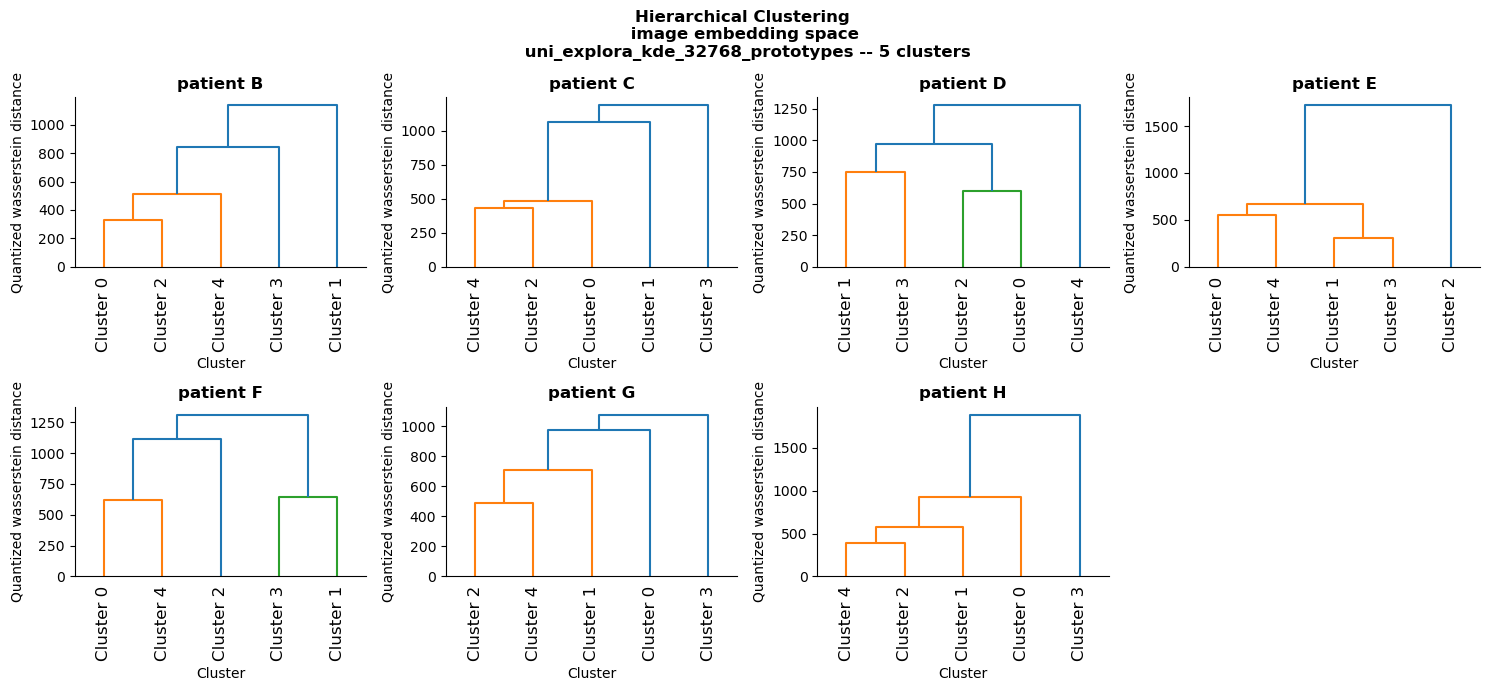

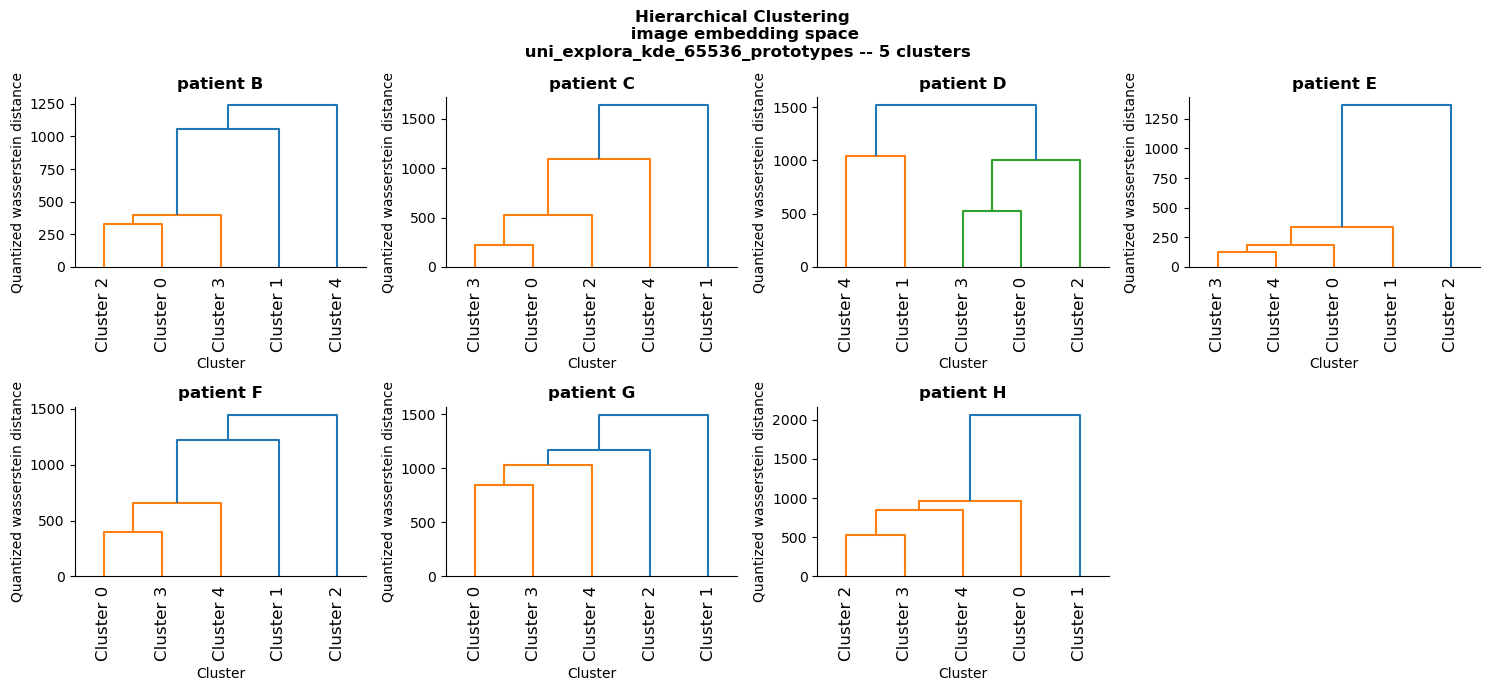

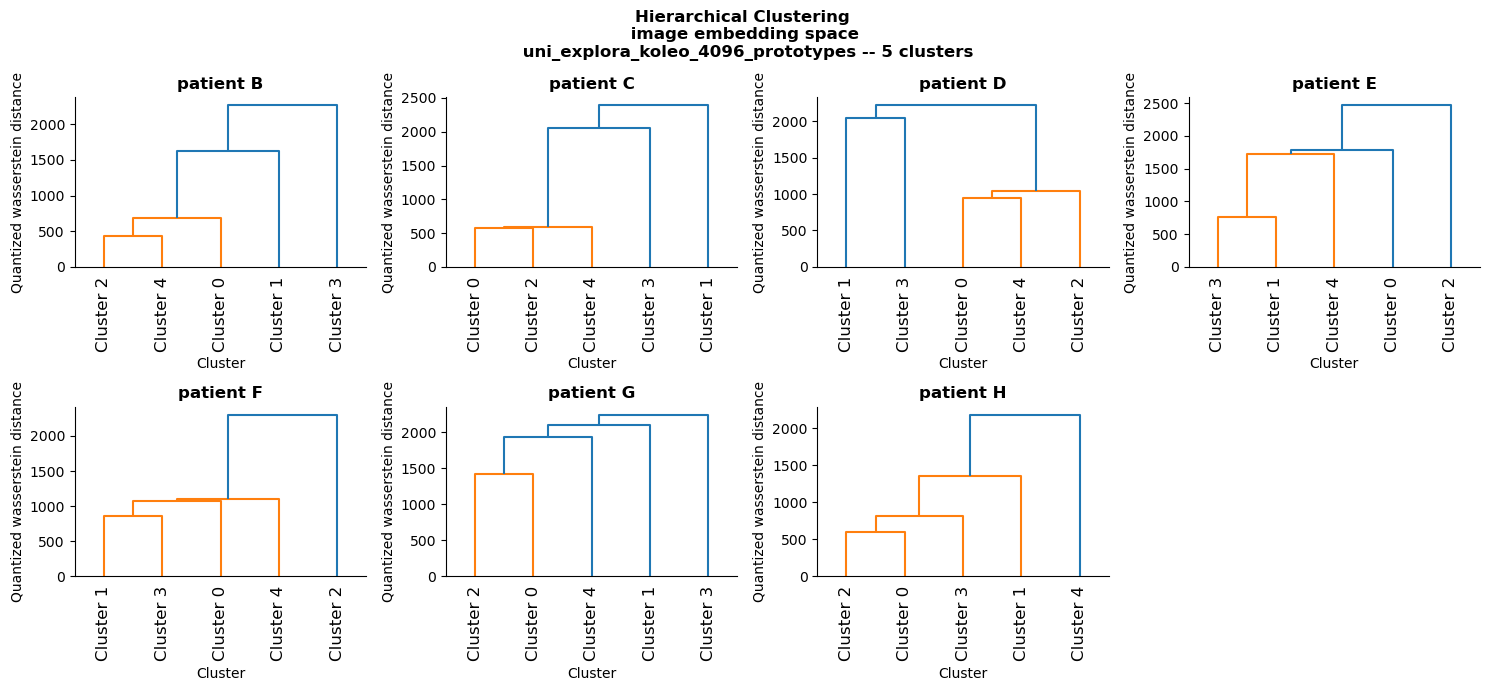

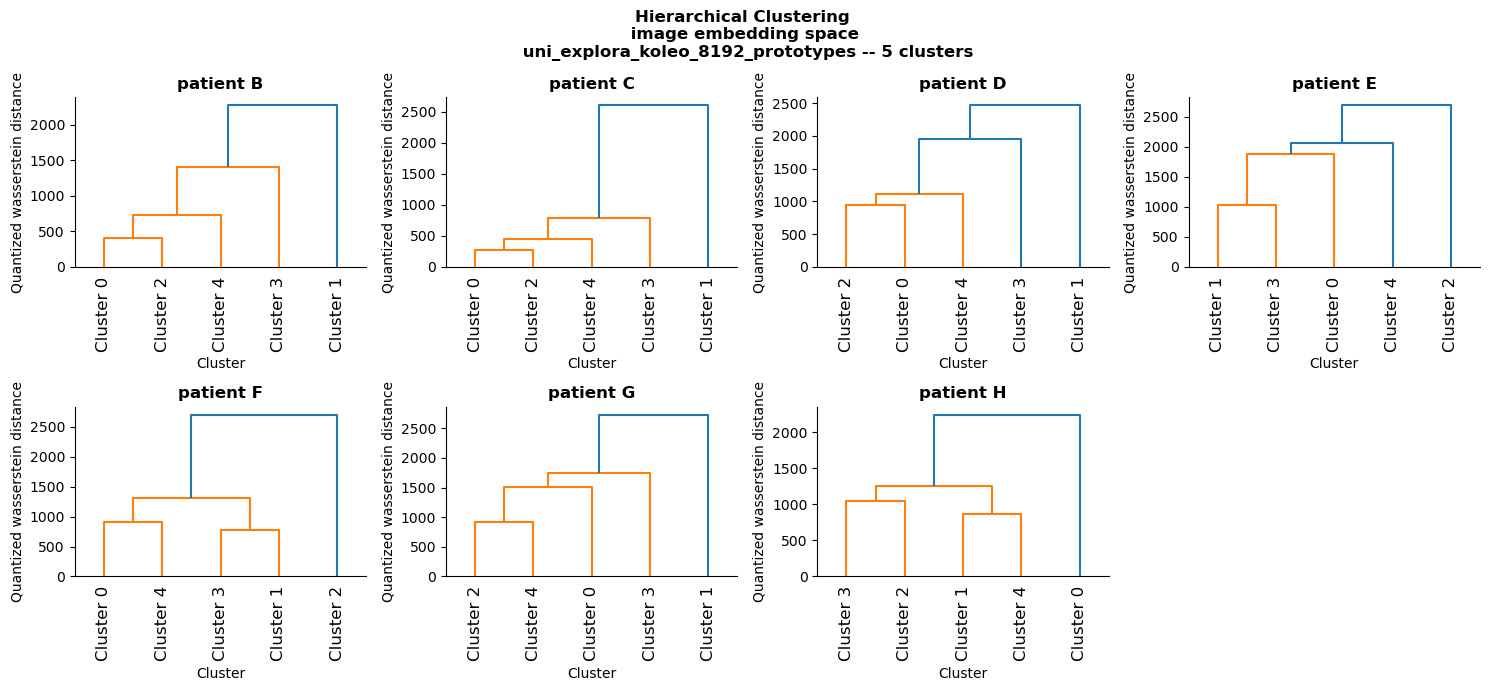

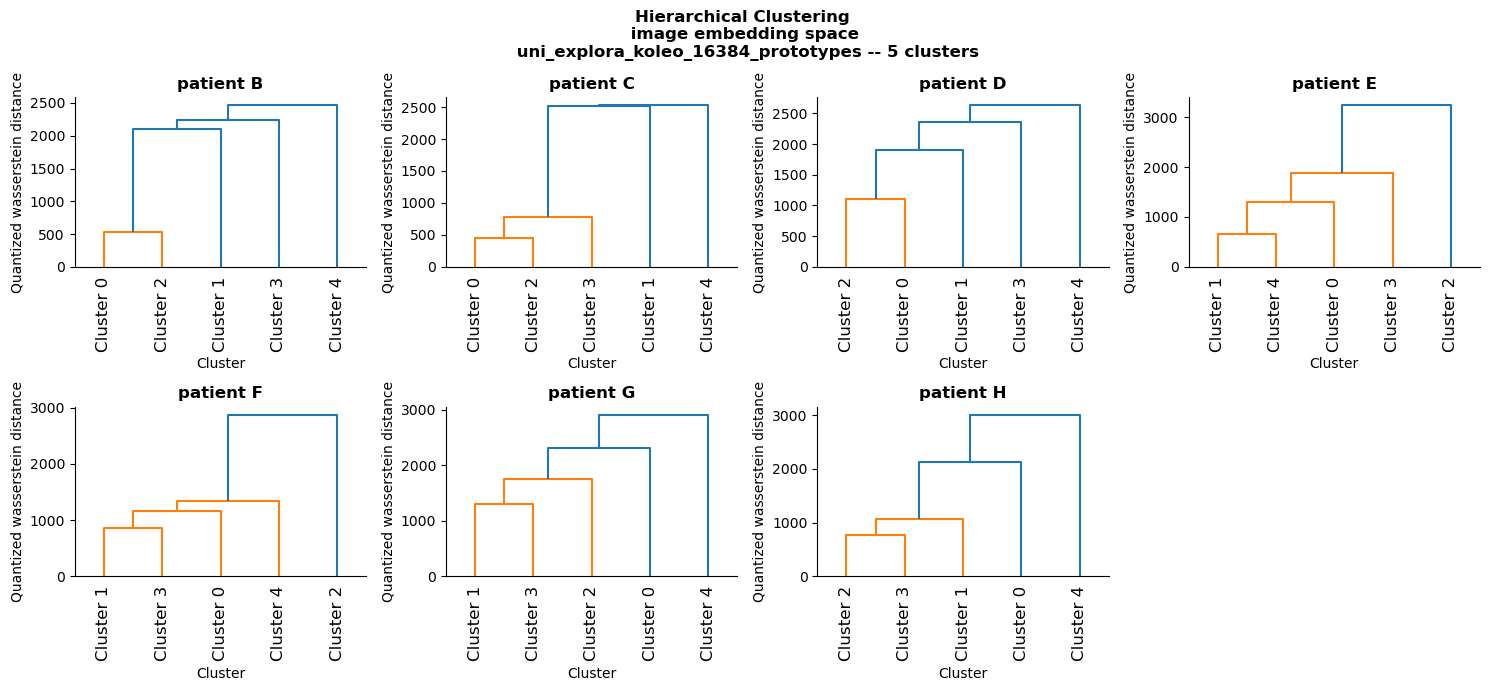

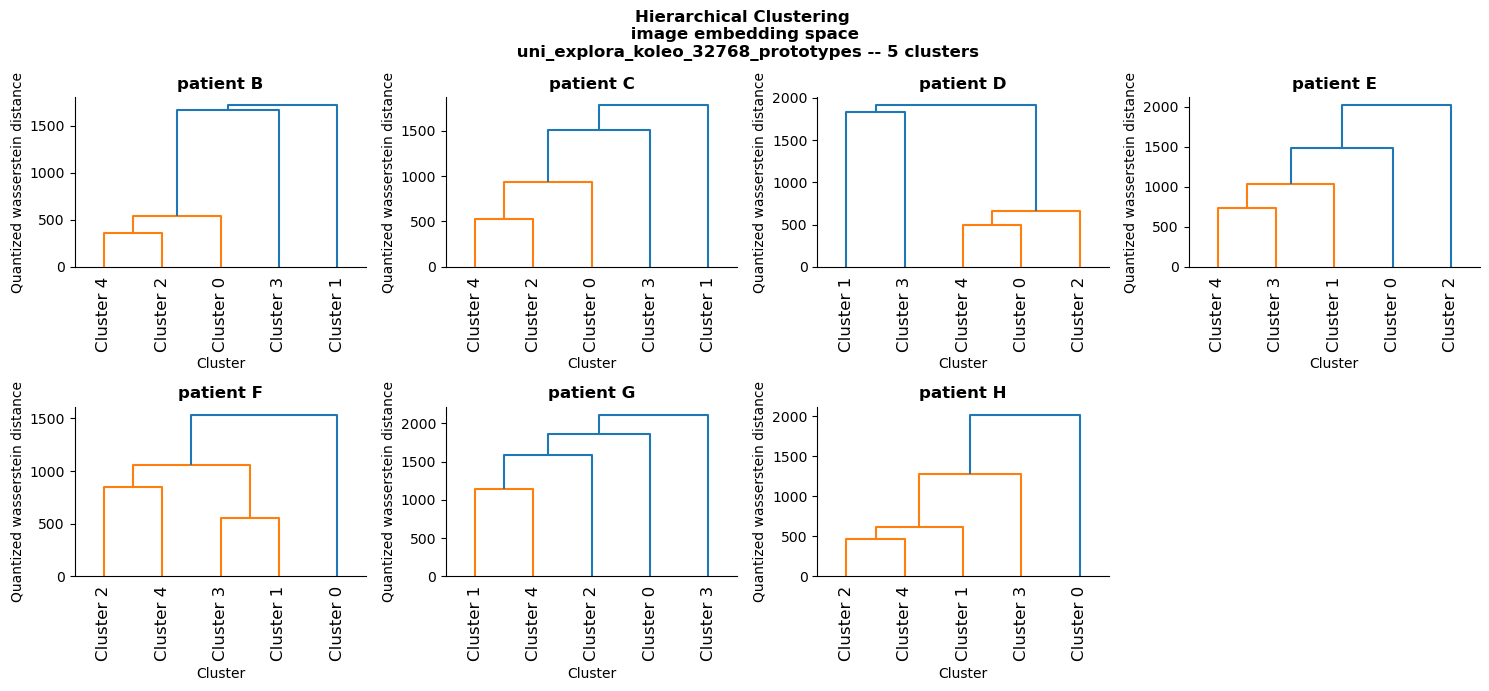

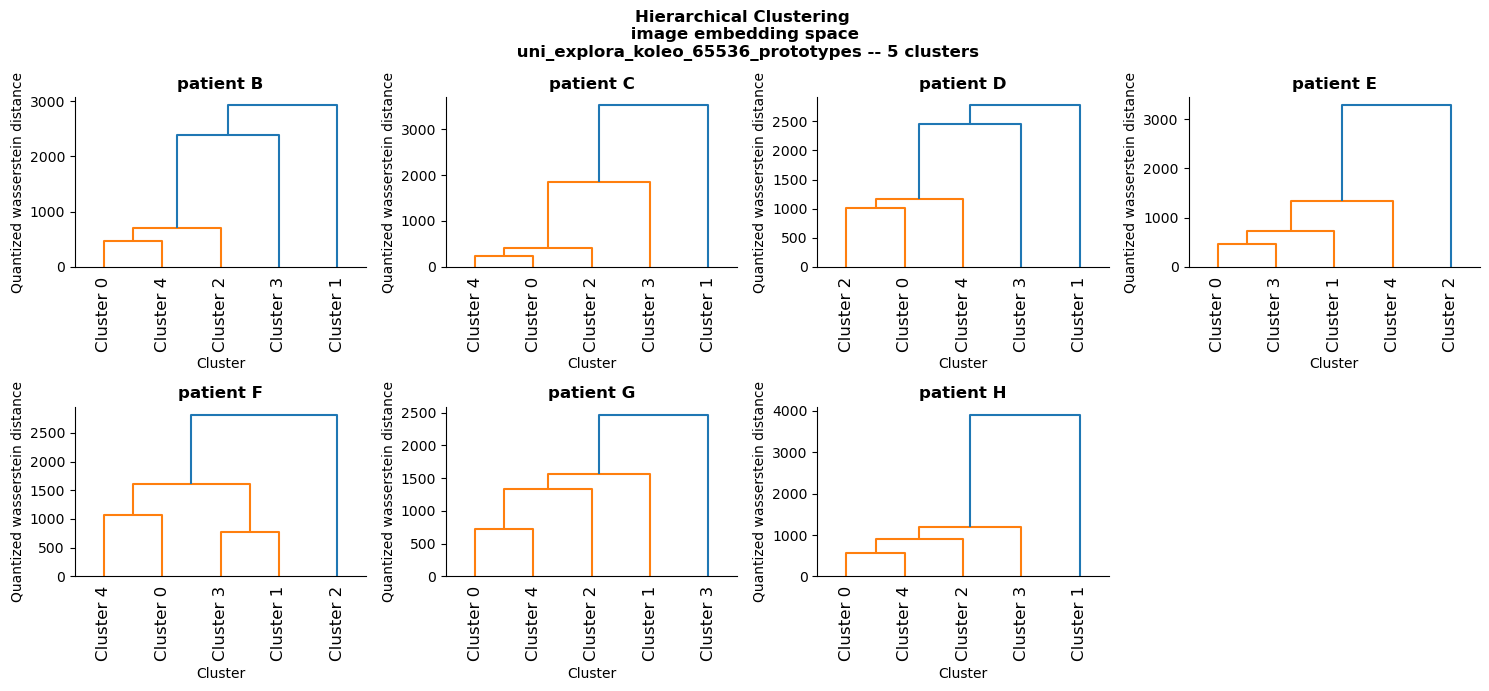

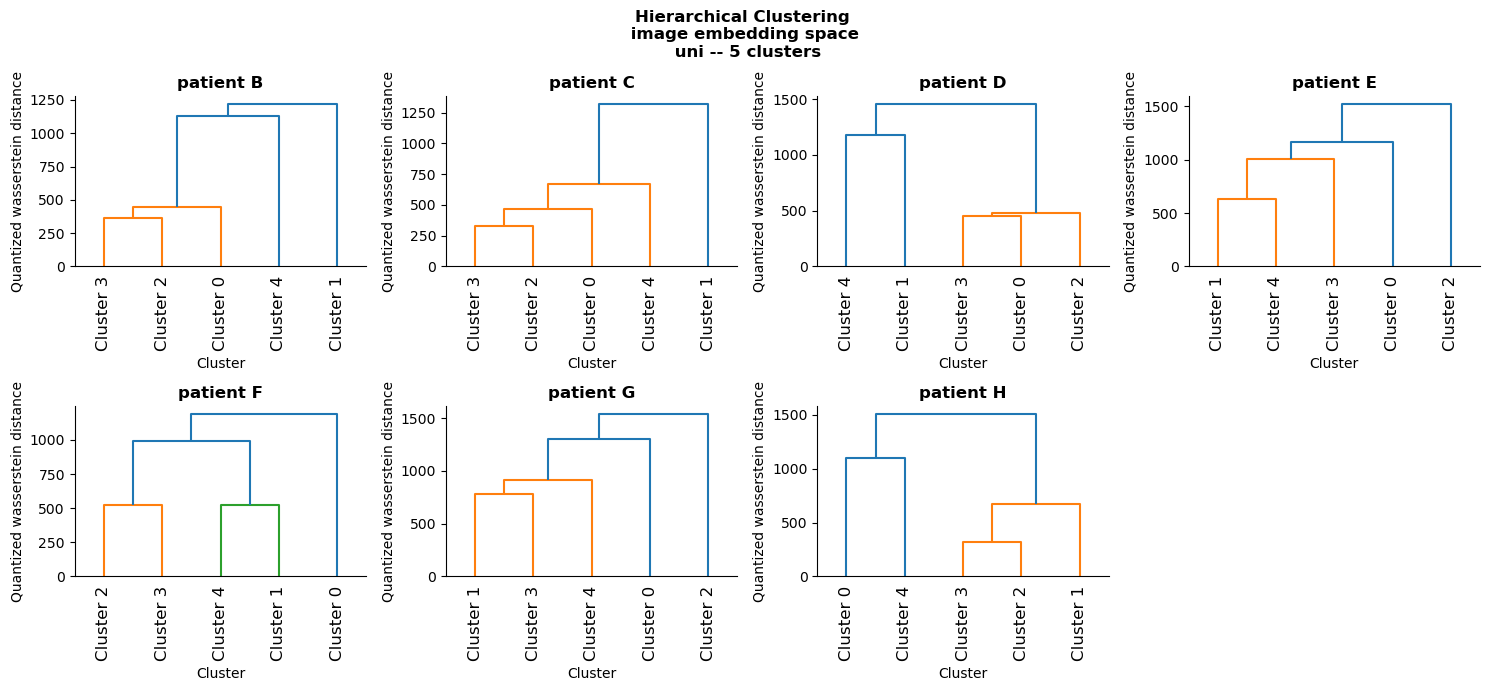

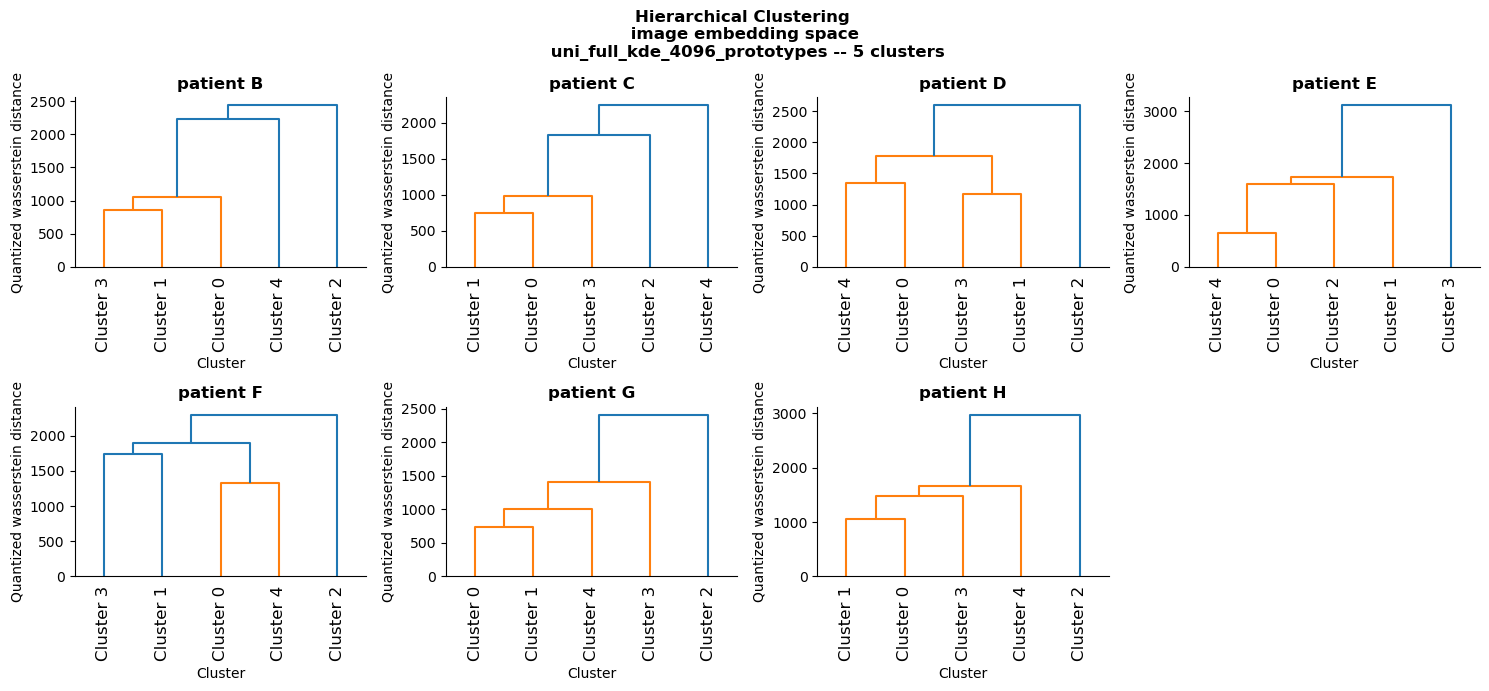

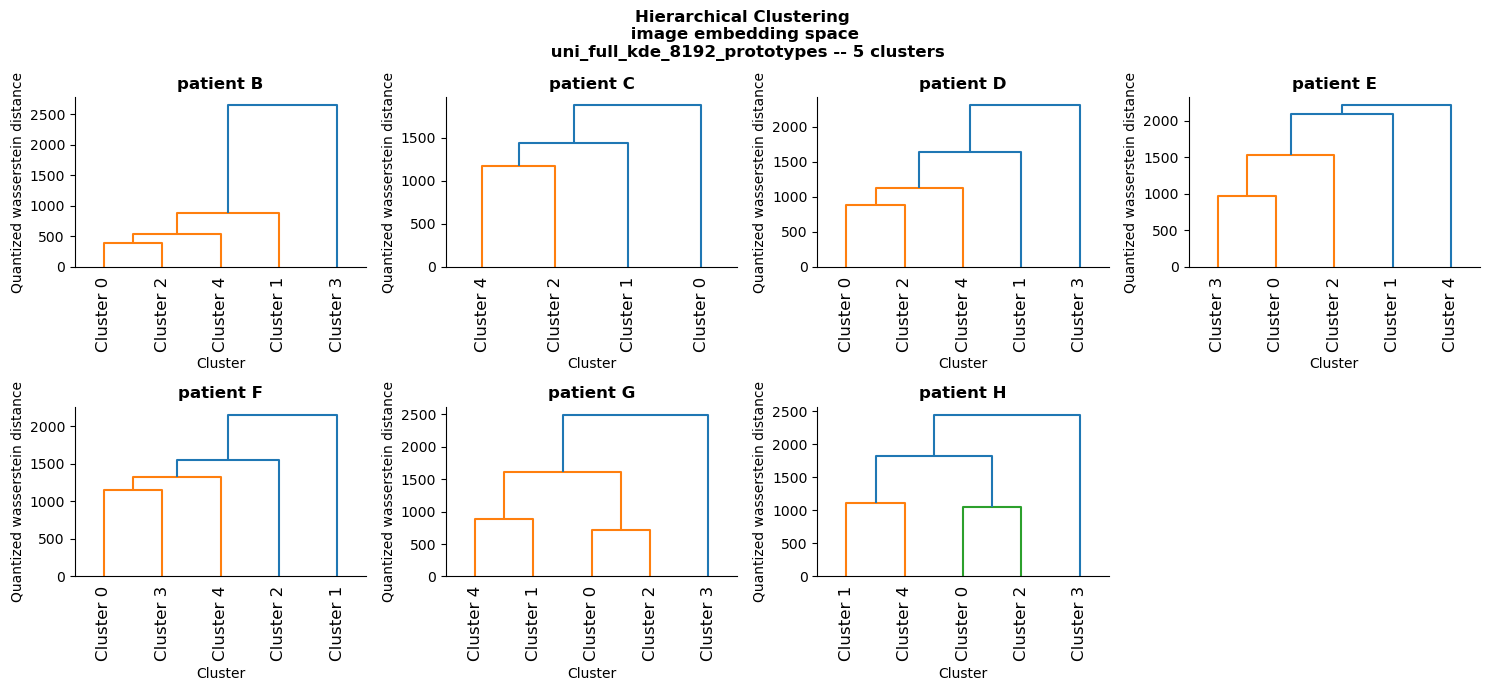

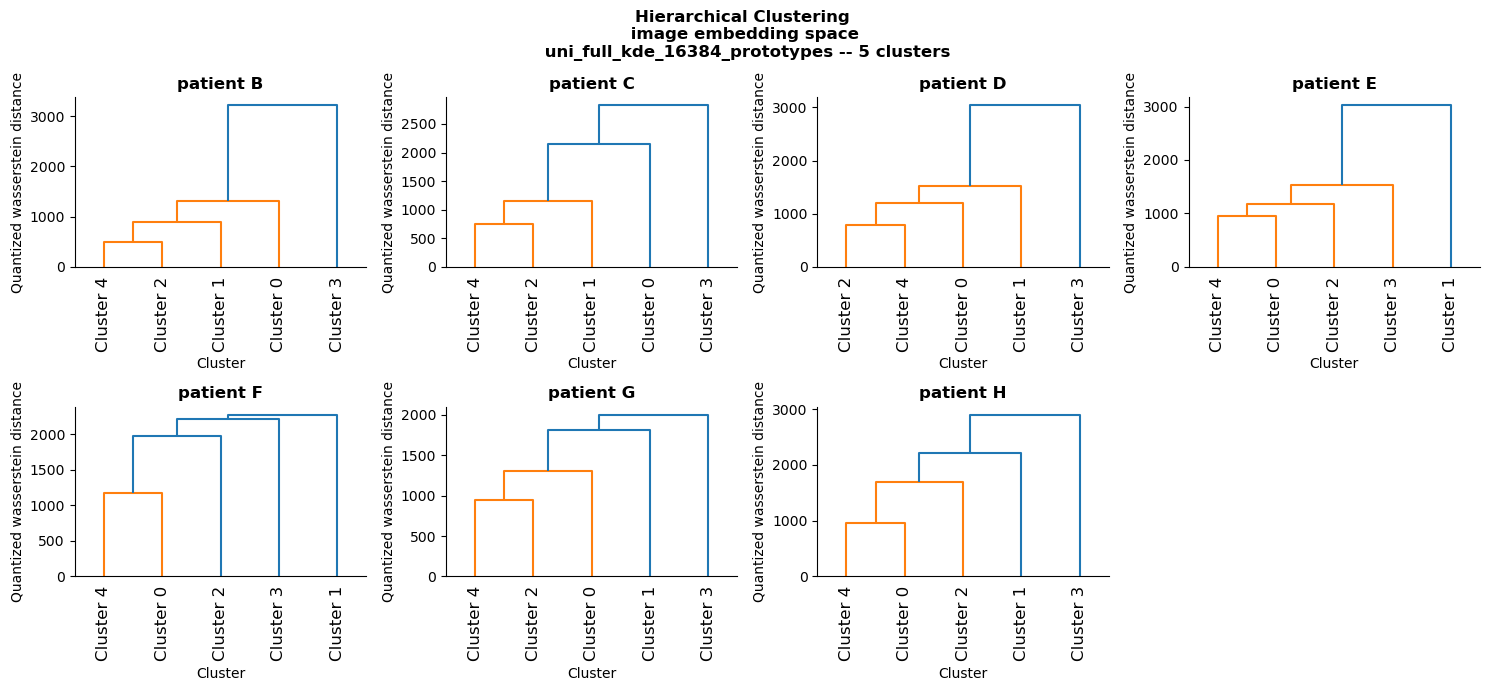

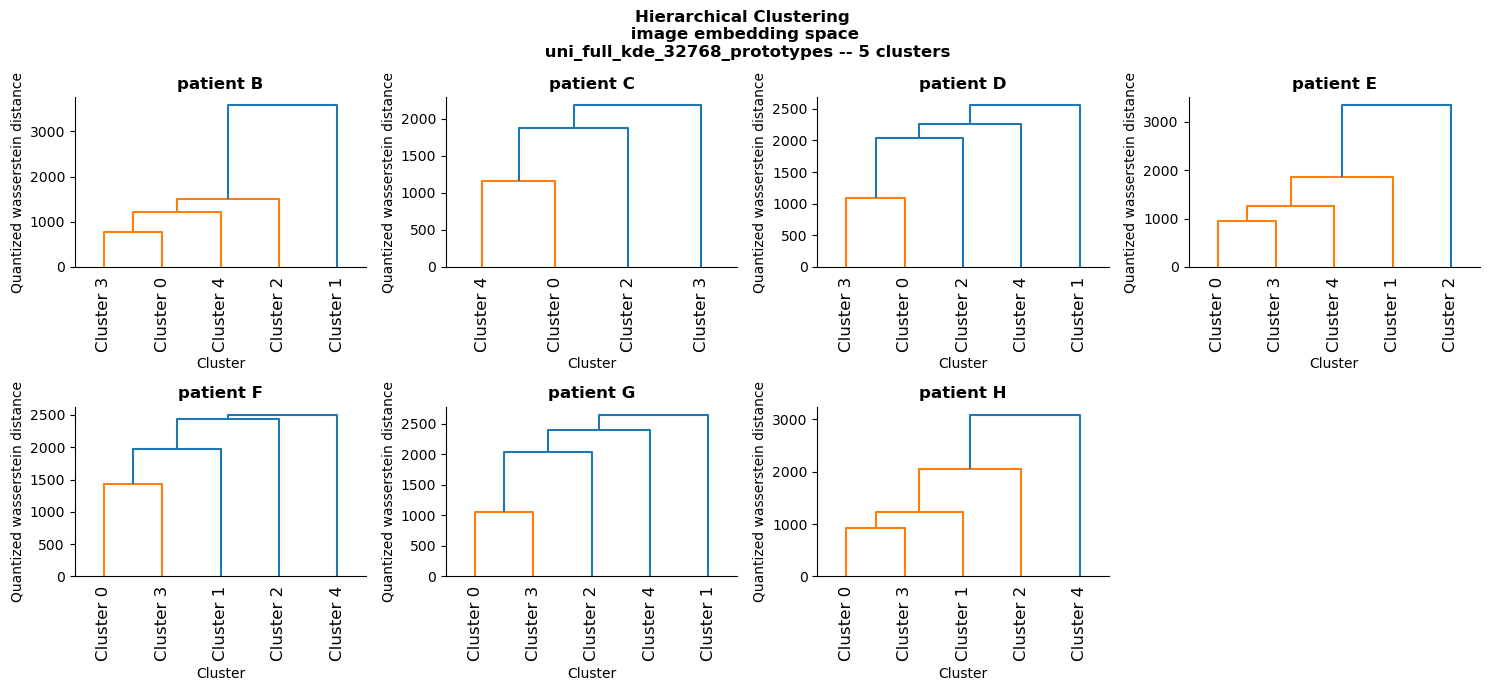

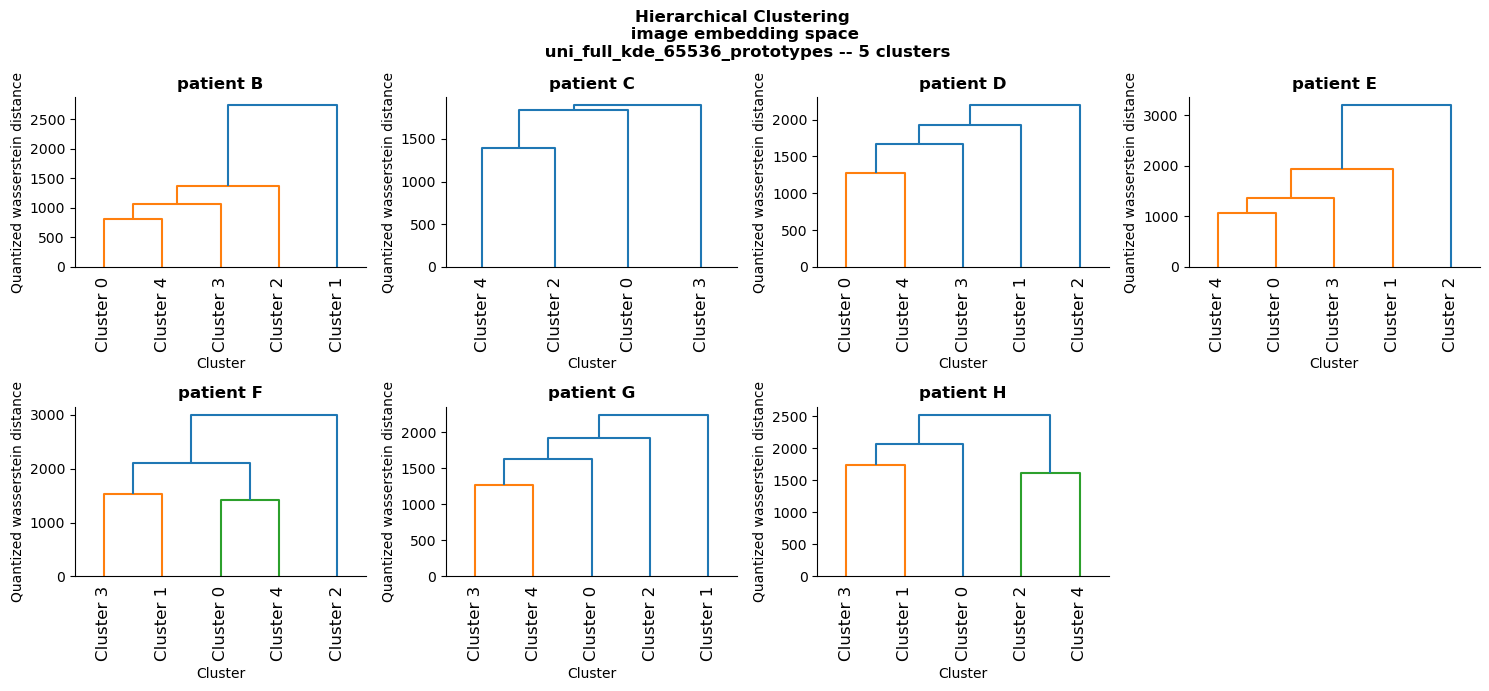

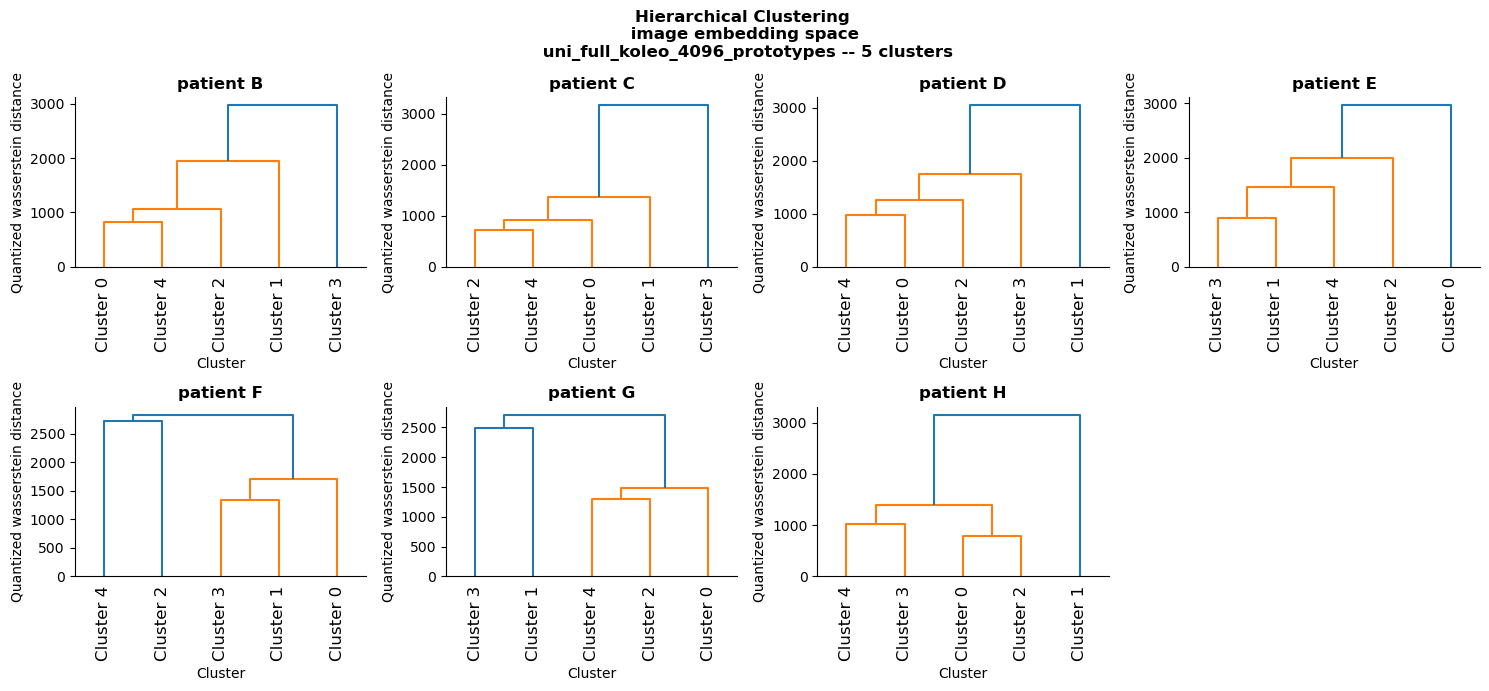

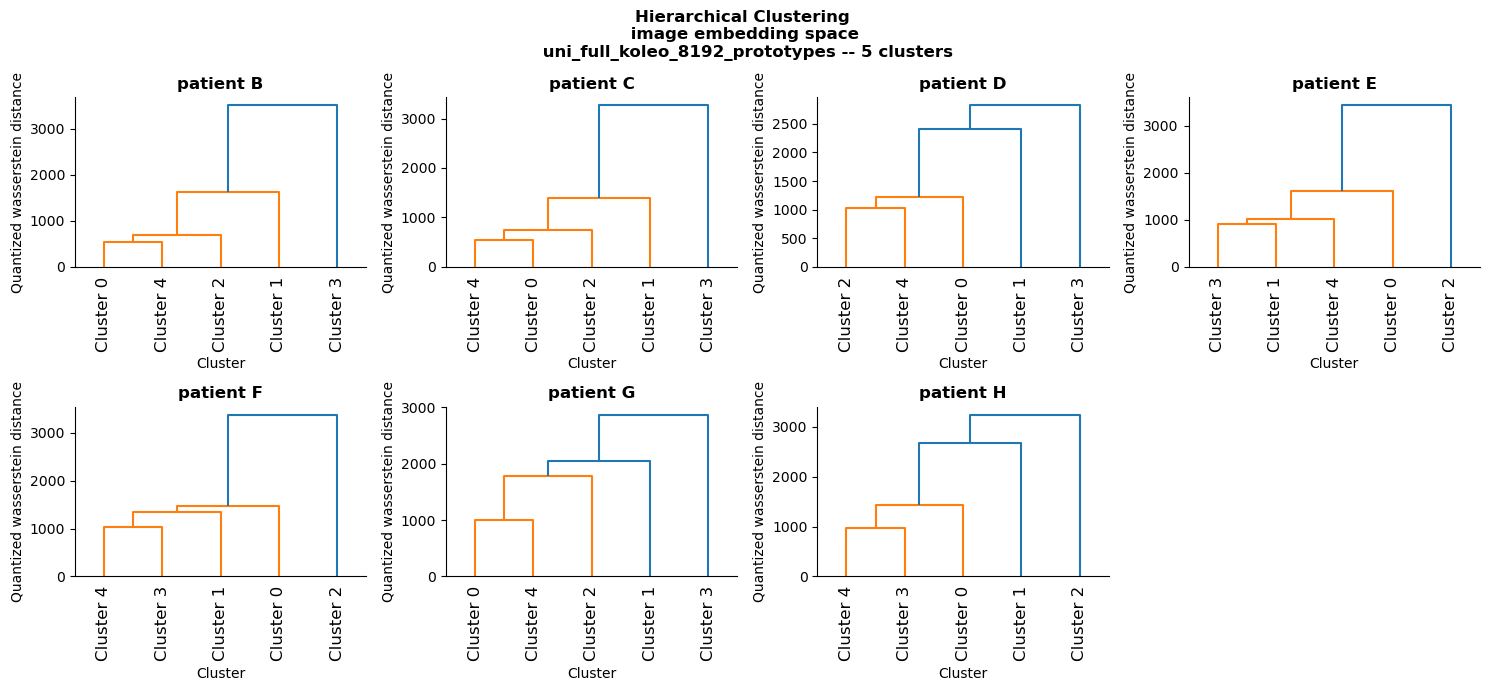

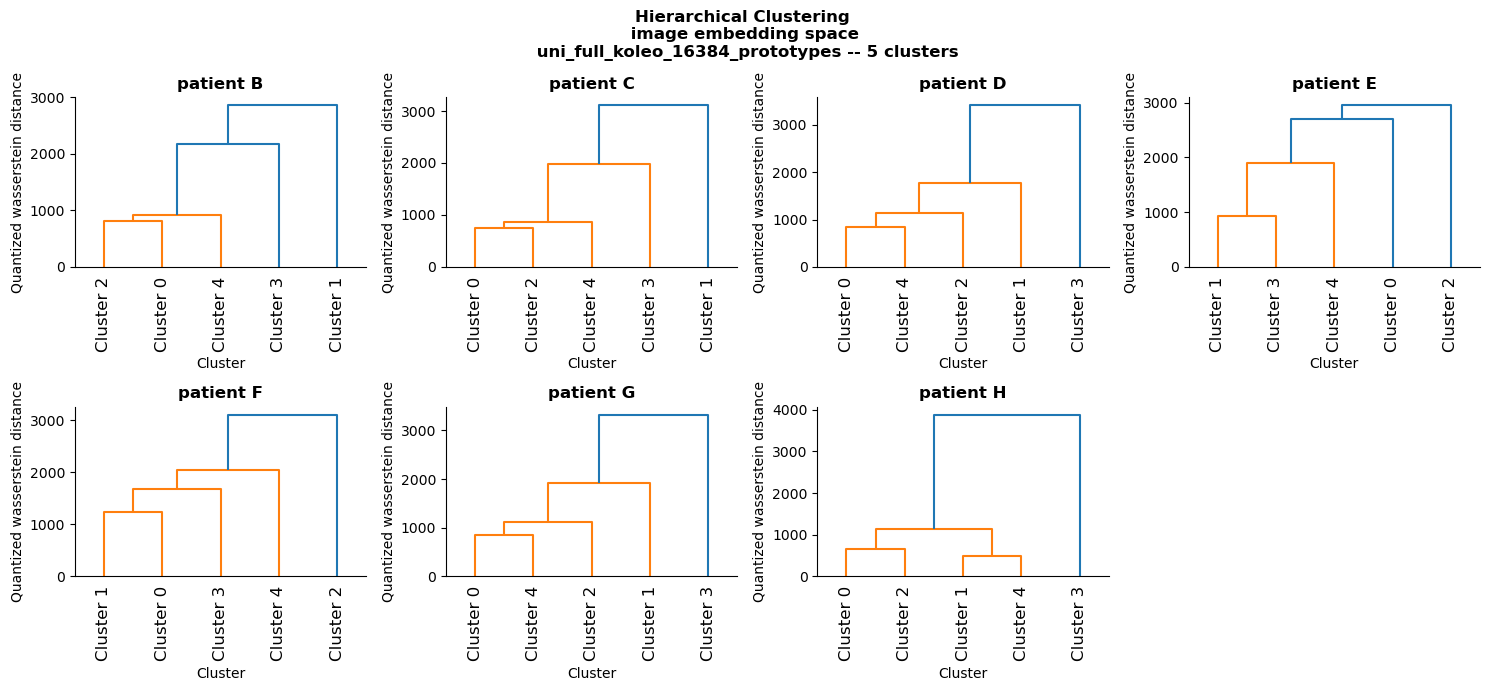

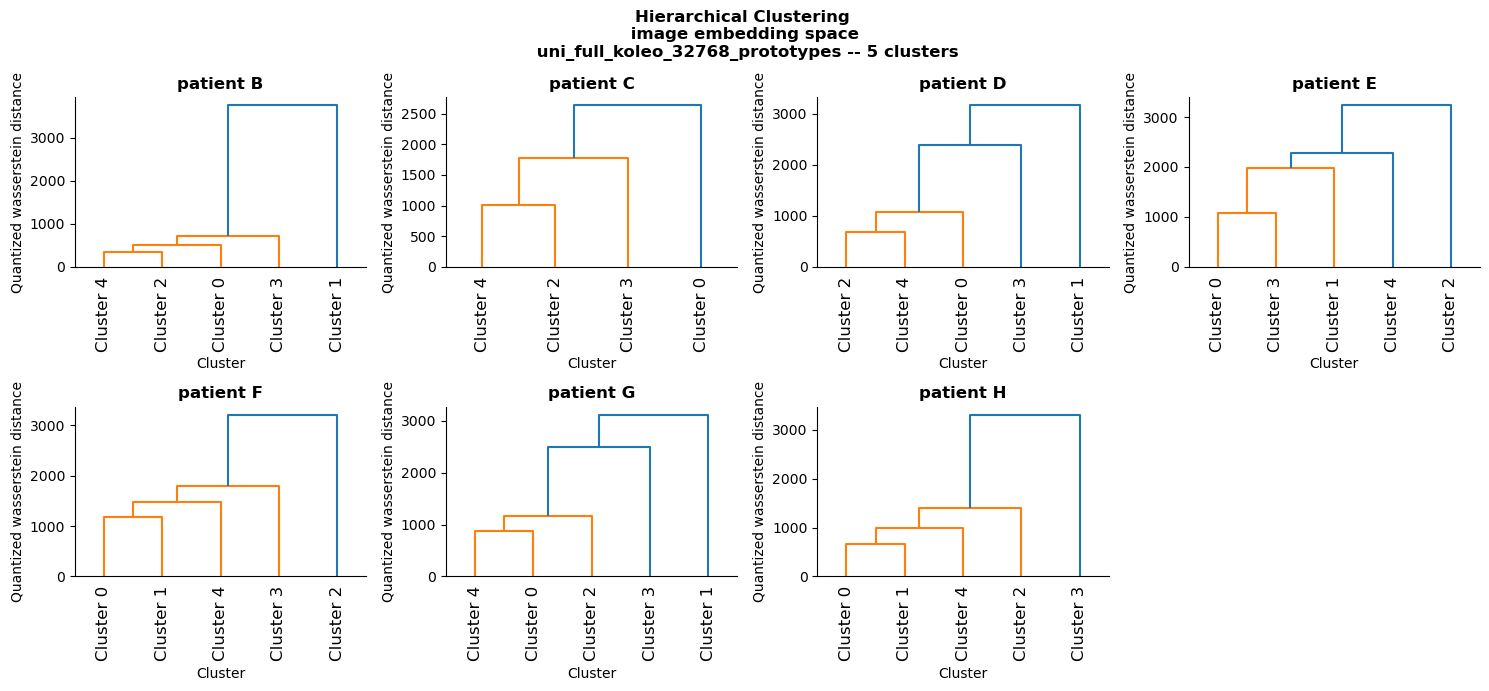

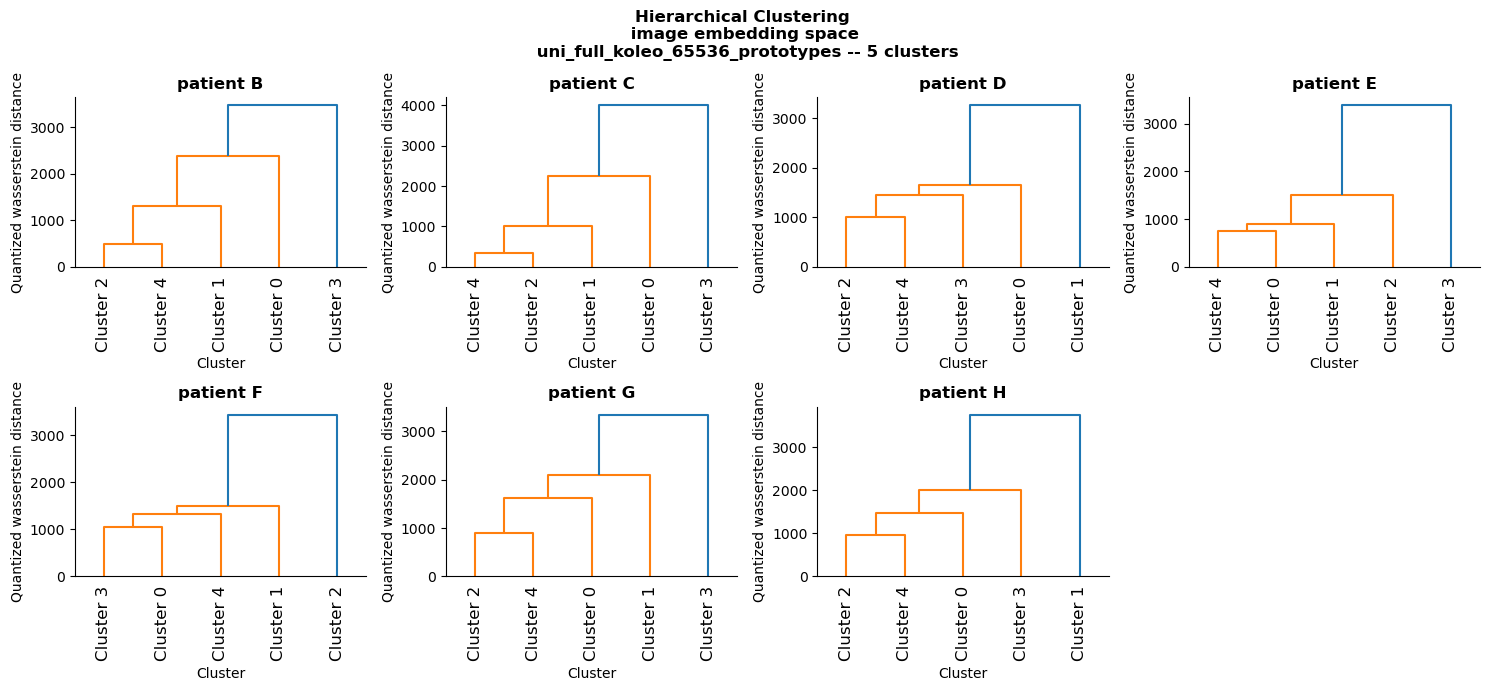

In [13]:
for model_type, names, benchmark_path in zip([config['retrained_model_list1_type'],
                                config['retrained_model_list2_type']],
                                [config['retrained_model_list1'],
                                config['retrained_model_list2']],
                                [config['retrained_benchmark_folder1'],
                                config['retrained_benchmark_folder2']]):
    for name in names:
        path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")

        opti_clusters = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, "kmeans", "optimal_clusters.csv"), index_col=0)

        
        filenames_one_patient = glob.glob(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"quantized_wasserstein_distance_image_{name}_{opti_clusters.loc[name, 'n_clusters']}_clusters_patient_B.csv"))
        
        for filename in filenames_one_patient:
            plt.figure(figsize=(15, 7))
            cluster_number = os.path.basename(filename).split("_")[-4]
            base_name = os.path.basename(filename)
            print(int(cluster_number))
            if int(cluster_number) > 2:
                for i, patient in enumerate(["B", "C", "D", "E", "F","G", "H"]):
                    quantized_wasserstein = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"quantized_wasserstein_distance_image_{name}_{cluster_number}_clusters_patient_{patient}.csv"), index_col=0)


                        
                    quantized_wasserstein.columns = [f"Cluster {col}" for col in quantized_wasserstein.columns]
                    quantized_wasserstein.index = [f"Cluster {idx}" for idx in quantized_wasserstein.index]



                    # Assuming quantized_wasserstein_inv is your distance matrix
                    # Ensure the matrix is in the correct format (square matrix)

                    # Perform hierarchical clustering
                    linked = sch.linkage(quantized_wasserstein, method='ward')

                    plt.subplot(2, 4, i+1)
                    # Plot the dendrogram
                    dendrogram = sch.dendrogram(linked, labels=quantized_wasserstein.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)
                    plt.title(f'patient {patient}', weight='bold')
                    plt.xlabel('Cluster')
                    plt.ylabel('Quantized wasserstein distance')
                    plt.xticks(rotation=90)
                    sns.despine()

                plt.suptitle(f'Hierarchical Clustering \n image embedding space \n {name} -- {cluster_number} clusters', weight='bold')

                plt.tight_layout()
                plt.savefig(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"dendrogram_{base_name.split('_patient_B.csv')[0]}_all_patients.pdf"), bbox_inches='tight')


4


NameError: name 'path_to_invasive_cancer_clustering_results' is not defined

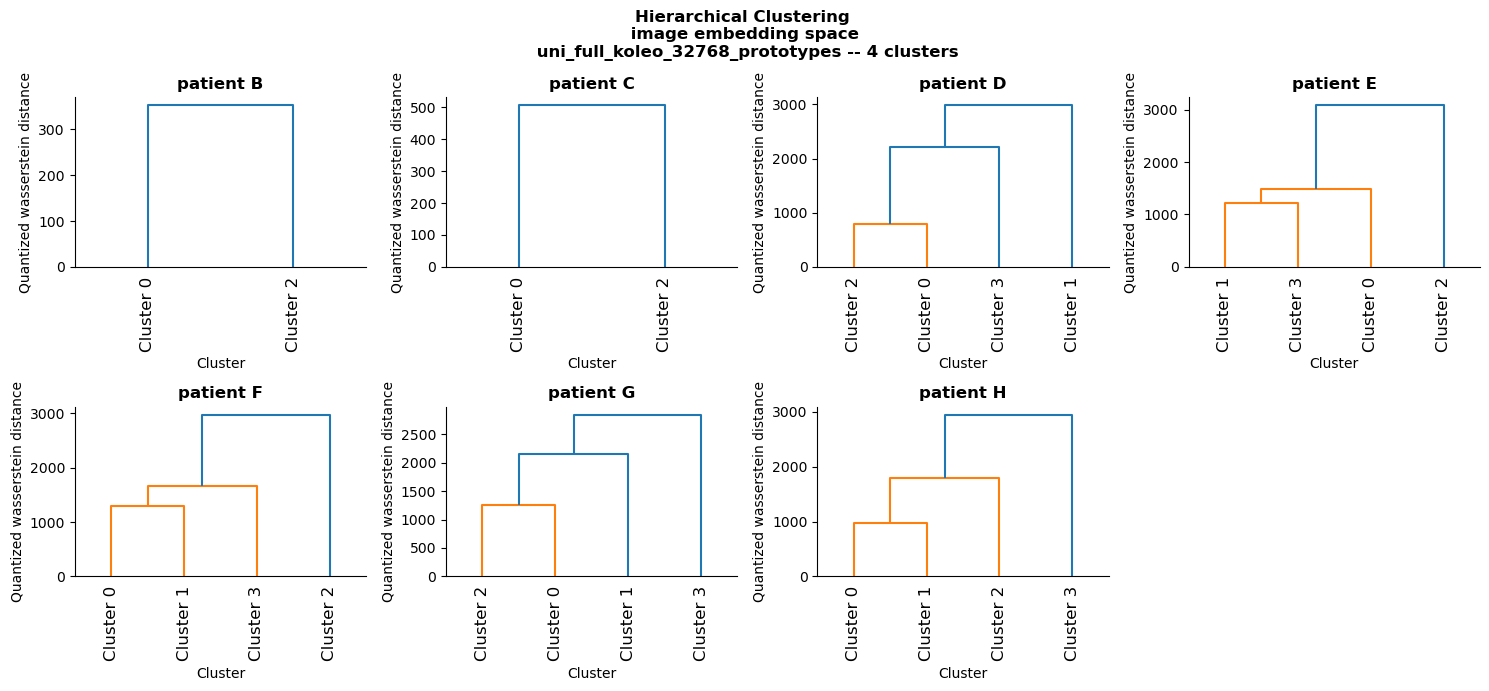

In [10]:

filenames_one_patient = glob.glob(os.path.join(benchmark_path, "invasive_cancer_clustering", config['invasive_cancer_clustering_algo'], model_of_interest, f"quantized_wasserstein_distance_image_{model_of_interest}_{n_clust_of_interest}_clusters_patient_B.csv"))

for filename in filenames_one_patient:
    plt.figure(figsize=(15, 7))
    cluster_number = os.path.basename(filename).split("_")[-4]
    base_name = os.path.basename(filename)
    print(int(cluster_number))
    if int(cluster_number) > 2:
        for i, patient in enumerate(["B", "C", "D", "E", "F","G", "H"]):
            quantized_wasserstein = pd.read_csv(os.path.join(benchmark_path, "invasive_cancer_clustering", config['invasive_cancer_clustering_algo'], model_of_interest, f"quantized_wasserstein_distance_image_{model_of_interest}_{n_clust_of_interest}_clusters_patient_{patient}.csv"), index_col=0)

            if patient == "B" or patient == "C":
                if 3 in quantized_wasserstein.index:
                    quantized_wasserstein.drop([3], axis=0, inplace=True)
                    quantized_wasserstein.drop(['3'], axis=1, inplace=True)
                if 1 in quantized_wasserstein.index:
                    quantized_wasserstein.drop([1], axis=0, inplace=True)
                    quantized_wasserstein.drop(['1'], axis=1, inplace=True)

                
            quantized_wasserstein.columns = [f"Cluster {col}" for col in quantized_wasserstein.columns]
            quantized_wasserstein.index = [f"Cluster {idx}" for idx in quantized_wasserstein.index]



            # Assuming quantized_wasserstein_inv is your distance matrix
            # Ensure the matrix is in the correct format (square matrix)

            # Perform hierarchical clustering
            linked = sch.linkage(quantized_wasserstein, method='ward')

            plt.subplot(2, 4, i+1)
            # Plot the dendrogram
            dendrogram = sch.dendrogram(linked, labels=quantized_wasserstein.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)
            plt.title(f'patient {patient}', weight='bold')
            plt.xlabel('Cluster')
            plt.ylabel('Quantized wasserstein distance')
            plt.xticks(rotation=90)
            sns.despine()

        plt.suptitle(f'Hierarchical Clustering \n image embedding space \n {model_of_interest} -- {cluster_number} clusters', weight='bold')

        plt.tight_layout()
        plt.savefig(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], model_of_interest, f"dendrogram_{base_name.split('_patient_B.csv')[0]}_all_patients.pdf"), bbox_inches='tight')

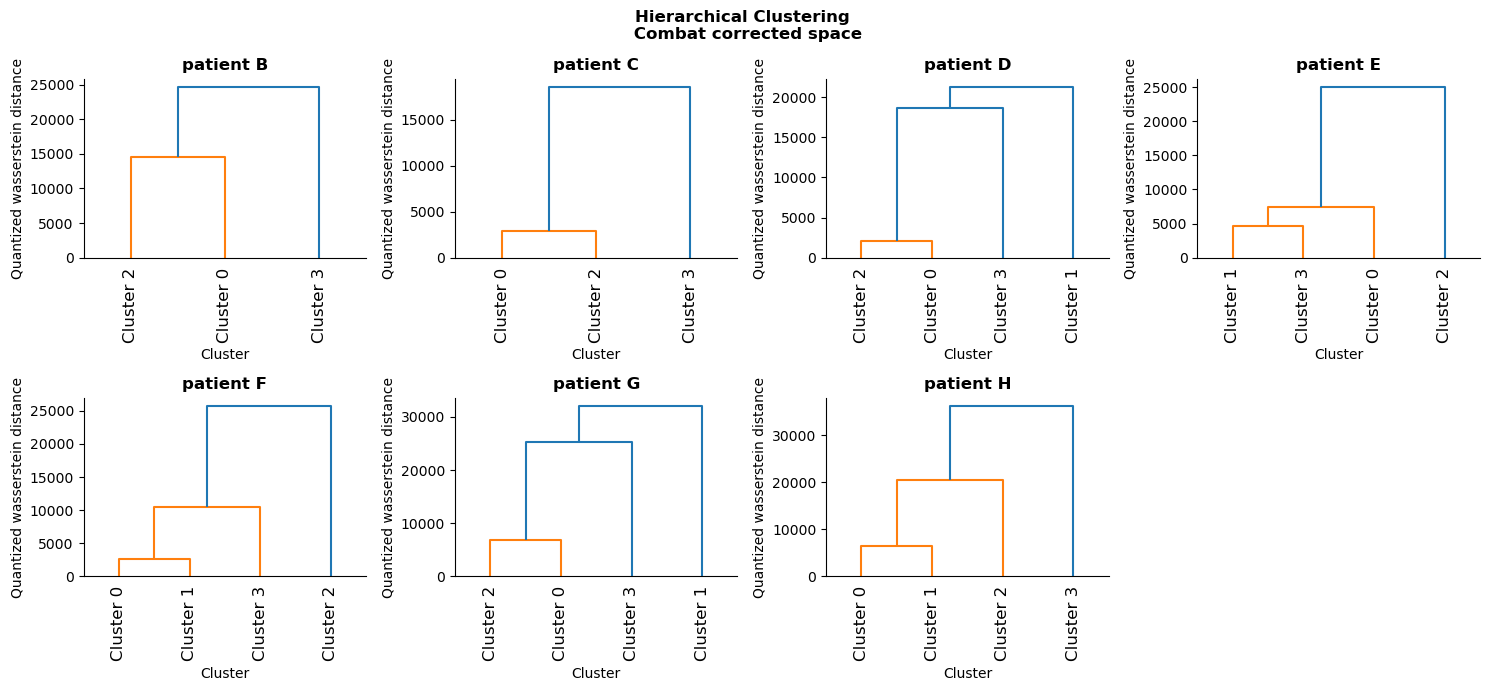

In [12]:
plt.figure(figsize=(15, 7))

for i, patient in enumerate(["B", "C", "D", "E", "F","G", "H"]):
    quantized_wasserstein = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], model_of_interest, f"quantized_wasserstein_distance_molecular_combat_corrected_{model_of_interest}_{n_clust_of_interest}_clusters_patient_{patient}.csv"), index_col=0)

    quantized_wasserstein.columns = [f"Cluster {col}" for col in quantized_wasserstein.columns]
    quantized_wasserstein.index = [f"Cluster {idx}" for idx in quantized_wasserstein.index]



    # Assuming quantized_wasserstein_inv is your distance matrix
    # Ensure the matrix is in the correct format (square matrix)

    # Perform hierarchical clustering
    linked = sch.linkage(quantized_wasserstein, method='ward')

    plt.subplot(2, 4, i+1)
    # Plot the dendrogram
    dendrogram = sch.dendrogram(linked, labels=quantized_wasserstein.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'patient {patient}', weight='bold')
    plt.xlabel('Cluster')
    plt.ylabel('Quantized wasserstein distance')
    plt.xticks(rotation=90)
    sns.despine()

plt.suptitle(f'Hierarchical Clustering \n Combat corrected space', weight='bold')

plt.tight_layout()


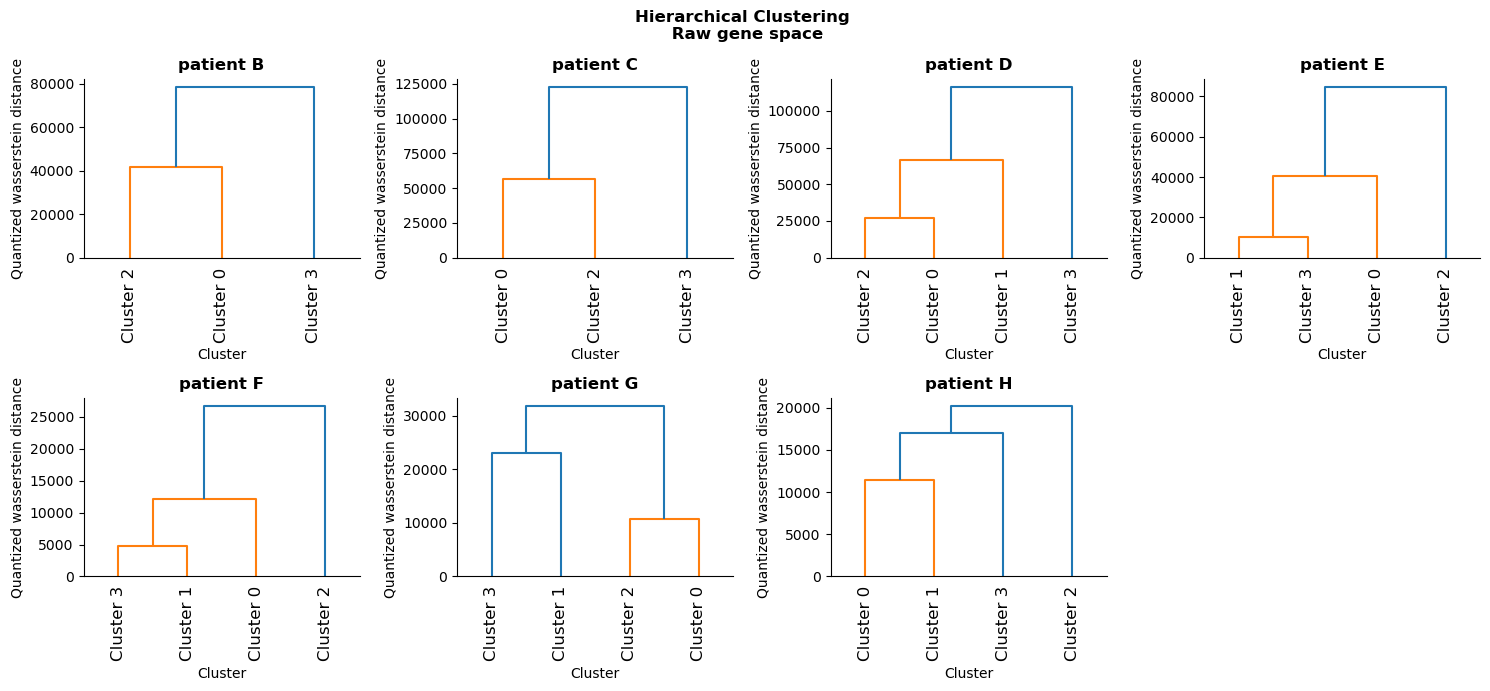

In [13]:
plt.figure(figsize=(15, 7))

for i, patient in enumerate(["B", "C", "D", "E", "F","G", "H"]):
    quantized_wasserstein = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], model_of_interest, f"quantized_wasserstein_distance_molecular_raw_filtered_{model_of_interest}_{n_clust_of_interest}_clusters_patient_{patient}.csv"), index_col=0)

    quantized_wasserstein.columns = [f"Cluster {col}" for col in quantized_wasserstein.columns]
    quantized_wasserstein.index = [f"Cluster {idx}" for idx in quantized_wasserstein.index]



    # Assuming quantized_wasserstein_inv is your distance matrix
    # Ensure the matrix is in the correct format (square matrix)

    # Perform hierarchical clustering
    linked = sch.linkage(quantized_wasserstein, method='ward')

    plt.subplot(2, 4, i+1)
    # Plot the dendrogram
    dendrogram = sch.dendrogram(linked, labels=quantized_wasserstein.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'patient {patient}', weight='bold')
    plt.xlabel('Cluster')
    plt.ylabel('Quantized wasserstein distance')
    plt.xticks(rotation=90)
    sns.despine()

plt.suptitle(f'Hierarchical Clustering \n Raw gene space', weight='bold')

plt.tight_layout()
